<a href="https://colab.research.google.com/github/NadiaCarvalho/MCM-Modal-Pitch-Space/blob/main/Modal_Pitch_Space_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Get Dataset
dataset = "The Session" # @param ["Meertens", "The Session", "COPOEM-Spain"]
if dataset == "Meertens":
  ID = '1jbTpKK6ba4Jel7VJzvASbkm8B8p1R9DK' # Meertens
elif dataset == "The Session":
  ID = '1V_Z6MDAjmvhPchT1N3M3TMWtx7d1yN-r' # The Session
elif dataset == "COPOEM-Spain":
  ID = '16CL1WR2kp63CN53VZ6Tb3GHFm5EFacjD' # COPOEM-Spain
else:
  raise ValueError('Dataset must be in ["Meertens", "The Session", "COPOEM-Spain"]')

!wget "https://docs.google.com/spreadsheets/d/{ID}/export?" -O dataset.xlsx

--2024-02-07 21:44:58--  https://docs.google.com/spreadsheets/d/1V_Z6MDAjmvhPchT1N3M3TMWtx7d1yN-r/export?
Resolving docs.google.com (docs.google.com)... 172.217.12.14, 2607:f8b0:4025:815::200e
Connecting to docs.google.com (docs.google.com)|172.217.12.14|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-14-5s-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/f8hpcrjvjpqjtu9ri77ctvf9vc/1707342295000/104970684271845940679/*/1V_Z6MDAjmvhPchT1N3M3TMWtx7d1yN-r [following]
--2024-02-07 21:44:59--  https://doc-14-5s-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/f8hpcrjvjpqjtu9ri77ctvf9vc/1707342295000/104970684271845940679/*/1V_Z6MDAjmvhPchT1N3M3TMWtx7d1yN-r
Resolving doc-14-5s-sheets.googleusercontent.com (doc-14-5s-sheets.googleusercontent.com)... 172.217.12.1, 2607:f8b0:4025:815::2001
Connecting to doc-14-5s-sheets.googleusercontent.com (doc-14-5s-sheets.googleusercontent.com)|172.217.12.1|:443... connected

# Process Dataset

In [ ]:
import ast
import fractions
import re

import numpy as np

def str2np(s):
  try:
    s.replace('\n', ',')
    s=re.sub('\[ +', '[', s.strip())
    s=re.sub('[,\s]+', ', ', s)
    if 'nan' in s:
      s = s.replace('nan', 'None')
    if 'Fraction' in s:
      s=re.sub('Fraction\(\d+, \d+\)', r'"\g<0>"', s, flags=re.I)
      return np.vectorize(lambda x: fractions.Fraction('/'.join(re.findall('\d+', x))) if 'Fraction' in x else float(x))(np.array(ast.literal_eval(s)))
    return np.array(ast.literal_eval(s))
  except Exception as e:
    print(e)

In [ ]:
import pandas as pd

df = pd.read_excel('dataset.xlsx', header=0, index_col=0)

df['pitches'] = df.apply(lambda x: str2np(x['pitches']), axis=1)
df['duration'] = df.apply(lambda x: str2np(x['duration']), axis=1)
df['beat_strength'] = df.apply(lambda x: str2np(x['beat_strength']), axis=1)

if dataset == "COPOEM-Spain":
  df = df[df['id'].str.startswith('ES')]
  df.loc[:, 'mode'] = df.loc[:, 'mode'].apply(lambda x: x[:3])

df.head()

,title,time signature,key,mode,abc,pitches,duration,beat_strength
0,'G Iomain Nan Gamhna,9/8,C,maj,T:'G Iomain Nan Gamhna\nM:9/8\nK:Cmaj\nG E E E...,"[67, 64, 64, 64, 62, 64, 62, 60, 67, 64, 64, 6...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[0.25, 0.25, 0.5, 0.25, 0.25, 0.5, 0.25, 0.25,..."
1,'S Daor An Tabac,4/4,C,min,T:'S Daor An Tabac\nM:4/4\nK:Cmin\nf B B c f B...,"[77, 70, 70, 72, 77, 70, 72, 72, 77, 70, 70, 7...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[1.0, 0.125, 0.25, 0.125, 0.5, 0.125, 0.25, 0...."
2,100 Watt Reels,4/4,C,dor,T:100 Watt Reels\nM:4/4\nK:Cdor\n|: c C C /2 C...,"[72, 60, 60, 60, 60, 67, 60, 60, 60, 60, 72, 6...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[1.0, 0.125, 0.25, 0.125, 0.5, 0.125, 0.25, 0...."
3,10th Bat Crossing Rhine,6/8,C,mix,T:10th Bat Crossing Rhine\nM:6/8\nK:Cmix\n|: c...,"[72, 77, 81, 72, 77, 81, 81, 82, 84, 81, 79, 7...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[0.25, 1.0, 0.25, 0.25, 0.5, 0.25, 1.0, 0.25, ..."
4,10th Bat Crossing Rhine,6/8,C,mix,T:10th Bat Crossing Rhine\nM:6/8\nK:Cmix\nf > ...,"[77, 81, 72, 77, 81, 81, 82, 84, 81, 79, 77, 7...","[0.75, 0.25, 0.5, 0.5, 0.5, 0.75, 0.25, 0.5, 0...","[0.25, 0.125, 0.5, 0.25, 0.25, 1.0, 0.125, 0.2..."


In [ ]:
#@title Calculate Histogram and Transition Matrix in C

import numpy as np
import music21 as m21

def get_histogram(vect):
  return np.histogram(vect, bins=np.arange(13))[0]

def get_transition_matrix(pitch_classes):
  try:
    transition_matrix = np.zeros((12, 12), dtype=int)
    np.add.at(transition_matrix, (pitch_classes[:-1], pitch_classes[1:]), 1)
    return transition_matrix
  except:
    return None

def get_transposed_pitch_classes(tune, back=True):
  real_tonic = m21.key.Key(tune['key']).tonic.pitchClass

  if back:
    pitches = tune['pitches'] + real_tonic
  else:
    pitches = tune['pitches'] - real_tonic

  return np.asarray(abs(pitches) % 12)

tunes = df[['mode', 'pitches']].copy()

if dataset == "COPOEM-Spain":
  tunes['oiginal_pc'] = df.apply(lambda x: np.asarray(abs(x['pitches']) % 12), axis=1)
  tunes['pitch_classes'] = df.apply(lambda x: get_transposed_pitch_classes(x, back=False), axis=1)
else:
  tunes['oiginal_pc'] = df.apply(lambda x: get_transposed_pitch_classes(x), axis=1)
  tunes['pitch_classes'] = df.apply(lambda x: np.asarray(abs(x['pitches']) % 12), axis=1)

tunes['pitch_class_histogram'] = tunes.apply(lambda x: get_histogram(x['pitch_classes']), axis=1)
tunes['pitch_class_transition_matrix'] = tunes.apply(lambda x: get_transition_matrix(x['pitch_classes']), axis=1)

tunes['mode'] = tunes['mode'].apply(lambda x: x.replace(" ", "").replace('\n', '').replace('maj', 'ion').replace('min', 'aeo').capitalize())

tunes.head()

,mode,pitches,oiginal_pc,pitch_classes,pitch_class_histogram,pitch_class_transition_matrix
0,Ion,"[67, 64, 64, 64, 62, 64, 62, 60, 67, 64, 64, 6...","[7, 4, 4, 4, 2, 4, 2, 0, 7, 4, 4, 4, 5, 7, 9, ...","[7, 4, 4, 4, 2, 4, 2, 0, 7, 4, 4, 4, 5, 7, 9, ...","[15, 0, 28, 0, 36, 2, 0, 17, 0, 22, 0, 14]","[[0, 0, 2, 0, 0, 0, 0, 4, 0, 7, 0, 1], [0, 0, ..."
1,Aeo,"[77, 70, 70, 72, 77, 70, 72, 72, 77, 70, 70, 7...","[5, 10, 10, 0, 5, 10, 0, 0, 5, 10, 10, 0, 8, 5...","[5, 10, 10, 0, 5, 10, 0, 0, 5, 10, 10, 0, 8, 5...","[16, 0, 0, 9, 0, 21, 0, 6, 16, 0, 12, 0]","[[2, 0, 0, 0, 0, 8, 0, 0, 5, 0, 0, 0], [0, 0, ..."
2,Dor,"[72, 60, 60, 60, 60, 67, 60, 60, 60, 60, 72, 6...","[0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[91, 0, 30, 18, 1, 35, 0, 66, 0, 28, 63, 6]","[[57, 0, 0, 4, 0, 0, 0, 16, 0, 4, 8, 2], [0, 0..."
3,Mix,"[72, 77, 81, 72, 77, 81, 81, 82, 84, 81, 79, 7...","[0, 5, 9, 0, 5, 9, 9, 10, 0, 9, 7, 5, 4, 7, 0,...","[0, 5, 9, 0, 5, 9, 9, 10, 0, 9, 7, 5, 4, 7, 0,...","[30, 0, 0, 0, 16, 32, 0, 31, 0, 42, 8, 0]","[[4, 0, 0, 0, 8, 8, 0, 0, 0, 10, 0, 0], [0, 0,..."
4,Mix,"[77, 81, 72, 77, 81, 81, 82, 84, 81, 79, 77, 7...","[5, 9, 0, 5, 9, 9, 10, 0, 9, 7, 5, 4, 7, 0, 4,...","[5, 9, 0, 5, 9, 9, 10, 0, 9, 7, 5, 4, 7, 0, 4,...","[28, 0, 0, 0, 16, 32, 0, 31, 0, 42, 6, 0]","[[4, 0, 0, 0, 8, 6, 0, 0, 0, 10, 0, 0], [0, 0,..."


Ion    15861
Aeo     3184
Dor     2971
Mix     1620
Name: mode, dtype: int64


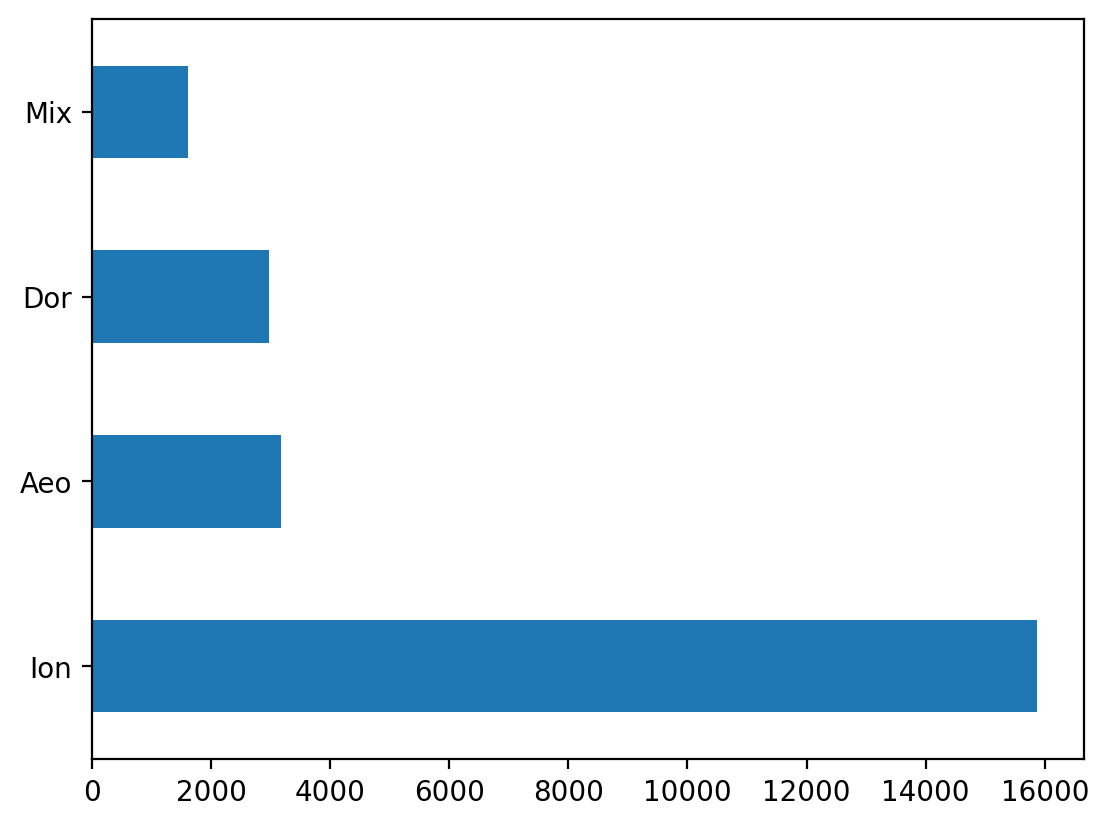

In [ ]:
tunes['mode'].value_counts().plot(kind='barh')
print(tunes['mode'].value_counts())

In [ ]:
def normalize_vector(arr, start=1, end=5):
  return (arr - arr.min())/(arr.max() - arr.min()) * (end - start) + start

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import r2_score

def compute_distances(pc1, pc2, pcp, vertical_weight, horizontal_weight, semitone_weight, ratio_weight):
    # Calculate the distance between pcp.max and pcp[pc2]
    vertical_distance = np.max(pcp) - pcp[pc2]

    # Compute the min between pcp[pc1] and pcp[pc2]
    min_value = min(pcp[pc1], pcp[pc2])

    # Count the number of elements in the array equal or above the min value
    count_forward = count_elements(pcp, pc1, pc2, min_value)
    count_backward = count_elements(pcp, pc2, pc1, min_value)
    horizontal_distance = min(count_forward, count_backward)

    semitone_distance = min(abs(pc1 - pc2), 12 - abs(pc1 - pc2))

    ratio = pcp[pc2] / pcp[pc1]

    # Calculate the weighted sum of distances
    distance = (
        vertical_weight * vertical_distance +
        horizontal_weight * horizontal_distance +
        semitone_weight * semitone_distance +
        ratio_weight * ratio
    )

    return distance

def count_elements(array, start, end, value):
    # Initialize the count to zero
    count = 0
    # Loop from start to end, wrapping around if necessary
    i = start
    while i != end:
        # Check if the element is equal or above the value
        if array[i] >= value:
            # Increment the count
            count += 1
        # Increment the index, wrapping around if necessary
        i = (i + 1) % len(array)
    # Return the count
    return count

def calculate_correlations(distance_matrix, reference_matrix):
    # Flatten the matrices to 1D arrays
    flat_distance = distance_matrix.flatten()
    flat_reference = reference_matrix.flatten()

    # Compute Pearson correlation
    pearson_corr, _ = pearsonr(flat_distance, flat_reference)


    # Compute Spearman rank correlation
    spearman_corr, _ = spearmanr(flat_distance, flat_reference)

    # R2
    r2 = r2_score(flat_reference, flat_distance)

    return pearson_corr, spearman_corr, r2

def calculate_correlations_w_pvalue(distance_matrix, reference_matrix):
    # Flatten the matrices to 1D arrays
    flat_distance = distance_matrix.flatten()
    flat_reference = reference_matrix.flatten()

    # Compute Pearson correlation
    pearson_corr, ppv = pearsonr(flat_distance, flat_reference)


    # Compute Spearman rank correlation
    spearman_corr, spv = spearmanr(flat_distance, flat_reference)

    # R2
    r2 = r2_score(flat_reference, flat_distance)

    return pearson_corr, ppv, spearman_corr, spv, r2

# Computation and Evaluation

In [ ]:
#@title
NUM_FOLDS = 1 # @param {type:"slider", min:1, max:10, step:1}
THEORIC = False # @param {type:"boolean"}

theoric_pcps = {
    'Ion': [5, 1, 2, 1, 3, 2, 1, 4, 1, 2, 1, 2],
    'Dor': [5, 1, 2, 3, 1, 2, 1, 4, 1, 2, 2, 1],
    'Mix': [5, 1, 2, 1, 3, 2, 1, 4, 1, 2, 2, 1],
    'Aeo': [5, 1, 2, 3, 1, 2, 1, 4, 2, 1, 2, 1]
}

from sklearn.model_selection import KFold
import random

modes = ['Ion', 'Aeo', 'Dor', 'Mix']

for mode in modes:
  tunes_mode = tunes[(tunes['mode'] == mode) & (tunes['pitch_classes'] != None) & (tunes['pitch_classes'].str.len() > 1)]

  if NUM_FOLDS > 1:
    kf = KFold(n_splits=NUM_FOLDS, random_state=1, shuffle=True)
    folds = kf.split(tunes_mode.index.to_list())
  else:
    f1 = tunes_mode.sample(frac=0.6)
    f2 = tunes_mode[~tunes_mode.index.isin(f1.index.to_list())]

    folds = [(tunes_mode.index.get_indexer_for((f1.index)).tolist(),
              tunes_mode.index.get_indexer_for((f2.index)).tolist())]

  for i, (train, test) in enumerate(folds):

    print(f'Mode {mode}, Fold {i}\n')

    if not THEORIC:
      pcp = normalize_vector(np.sum(tunes_mode.iloc[train]['pitch_class_histogram']))
      min_pcp = min(pcp)
      max_pcp = max(pcp)
      pcp = 1 + 5 * (np.array(pcp) - min_pcp) / (max_pcp - min_pcp)
    else:
      pcp = theoric_pcps[mode]
      min_pcp = min(pcp)
      max_pcp = max(pcp)
      pcp = 1 + 5 * (np.array(pcp) - min_pcp) / (max_pcp - min_pcp)

    print('pcp', pcp)

    TMS = np.sum(tunes_mode.iloc[train]['pitch_class_transition_matrix'])
    TMS_test = np.sum(tunes_mode.iloc[test]['pitch_class_transition_matrix'])

    print('TMS', TMS)
    print('TMS test', TMS_test)
    print()

    # Define the number of steps for iterating over the weights
    iter_nr = 11

    # Create matrices to store correlation values
    pearson_correlations = np.zeros((iter_nr, iter_nr, iter_nr, iter_nr))
    spearman_correlations = np.zeros((iter_nr, iter_nr, iter_nr, iter_nr))
    r2_correlations = np.zeros((iter_nr, iter_nr, iter_nr, iter_nr))

    # Create an empty matrix to store distances
    distance_matrix = np.zeros((12, 12))

    # Loop over weight combinations
    for i, vertical_weight in enumerate(np.linspace(0, 1, iter_nr)):
        for j, horizontal_weight in enumerate(np.linspace(0, 1, iter_nr)):
            for k, semitone_weight in enumerate(np.linspace(0, 1, iter_nr)):
                for l, ratio_weight in enumerate(np.linspace(0, 1, iter_nr)):
                    # Calculate distances
                    for pc1 in range(12):
                        for pc2 in range(12):
                            distance_matrix[pc1, pc2] = compute_distances(
                                pc1, pc2, pcp, vertical_weight, horizontal_weight, semitone_weight, ratio_weight
                            )

                    # Calculate Pearson and Spearman correlations
                    pearson_corr, spearman_corr, r2 = calculate_correlations(distance_matrix, TMS)

                    # Store the correlations
                    pearson_correlations[i, j, k, l] = pearson_corr
                    spearman_correlations[i, j, k, l] = spearman_corr
                    r2_correlations[i, j, k, l] = r2

    # try once with all weight = [1, 1, 1, 1]
    dmatrix_w1 = np.zeros((12, 12))
    for pc1 in range(12):
      for pc2 in range(12):
        dmatrix_w1[pc1, pc2] = compute_distances(
          pc1, pc2, pcp, 1, 1, 1, 1
        )
    pearson_corr_w1, ppv_w1, spearman_corr_w1, spv_w1, r2_w1 = calculate_correlations_w_pvalue(
        dmatrix_w1, TMS)

    # Print the results for the current mode
    print(f"\nResults for {mode} mode:")
    best_pearson_corr_index = np.unravel_index(np.nanargmin(pearson_correlations), pearson_correlations.shape)
    best_spearman_corr_index = np.unravel_index(np.nanargmin(spearman_correlations), spearman_correlations.shape)
    best_r2_corr_index = np.unravel_index(np.nanargmin(r2_correlations), r2_correlations.shape)

    best_pearson_corr = pearson_correlations[best_pearson_corr_index]
    best_spearman_corr = spearman_correlations[best_spearman_corr_index]
    best_r2_corr = r2_correlations[best_r2_corr_index]

    best_weights_pearson = (
        np.linspace(0, 1, iter_nr)[best_pearson_corr_index[0]],
        np.linspace(0, 1, iter_nr)[best_pearson_corr_index[1]],
        np.linspace(0, 1, iter_nr)[best_pearson_corr_index[2]],
        np.linspace(0, 1, iter_nr)[best_pearson_corr_index[3]]
    )
    best_weights_spearman = (
        np.linspace(0, 1, iter_nr)[best_spearman_corr_index[0]],
        np.linspace(0, 1, iter_nr)[best_spearman_corr_index[1]],
        np.linspace(0, 1, iter_nr)[best_spearman_corr_index[2]],
        np.linspace(0, 1, iter_nr)[best_spearman_corr_index[3]]
    )
    best_weights_r2 = (
        np.linspace(0, 1, iter_nr)[best_r2_corr_index[0]],
        np.linspace(0, 1, iter_nr)[best_r2_corr_index[1]],
        np.linspace(0, 1, iter_nr)[best_r2_corr_index[2]],
        np.linspace(0, 1, iter_nr)[best_r2_corr_index[3]]
    )

    # Use the negative correlation values
    print("Order of weights: Vertical, Horizontal, Semitone, Ratio")
    print("Best (Negative) Pearson Correlation:", best_pearson_corr)
    print("Best Weights (Pearson):", best_weights_pearson)

    print("Best (Negative) Spearman Correlation:", best_spearman_corr)
    print("Best Weights (Spearman):", best_weights_spearman)

    print("Best (Negative) R2 Correlation:", best_r2_corr)
    print("Best Weights (R2):", best_weights_r2)

    print("Embeddings:", pcp)

    print("Correlations for all weights equal:")
    print("(Negative) Pearson Correlation:", pearson_corr_w1, "p value", ppv_w1)
    print("(Negative) Spearman Correlation:", spearman_corr_w1, "p value", spv_w1)
    print("(Negative) R2 Correlation:", r2_w1)

    # Calculate distances using the best weights
    for pc1 in range(12):
        for pc2 in range(12):
            distance_matrix[pc1, pc2] = compute_distances(
                pc1, pc2, pcp, best_weights_pearson[0], best_weights_pearson[1], best_weights_pearson[2],
                best_weights_pearson[3]
            )

    # Compute Pearson correlation with the reference TMS array using flattened matrices
    correlation_with_best_weights, p_value = pearsonr(distance_matrix.flatten(), TMS_test.flatten())

    print("Correlation with TMS array using best weights:", correlation_with_best_weights, "p value:", p_value)

Mode Ion, Fold 0

pcp [6.         1.0014182  4.32389218 1.         5.03232277 2.89673895
 1.05409414 5.09670897 1.00022286 3.51926724 1.03839265 2.74580213]
TMS [[42487    77 51120    67 40074  6104    44 31057    24 33373   698 36423]
 [   46     2   787     0    54     4     2     1     0    56     7    16]
 [57714   774 15394   209 51539  7788   146 11200    17  3795   443 15065]
 [   44     0   192    22   537    47    10    30     2    14     6     3]
 [45053    42 54845   474 13485 37073   332 41581    54  5743    21   909]
 [ 2303    12 18283    58 35075  5346   278 22259    15  9123   186  1151]
 [   20     0   164     3   115   201    21  2647    18   371     0    14]
 [37531    12  6770    46 52071 28029  2397 24960   135 42411   292  7709]
 [   24     0    10     1    43    20     7   112    12   634     6    48]
 [19091    37  6079    12  3912  8743   318 51236   581 11488   895 22252]
 [  347     2   324     4    29   197     1   710     7   767    64   344]
 [40095    19 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))



Results for Ion mode:
Order of weights: Vertical, Horizontal, Semitone, Ratio
Best (Negative) Pearson Correlation: -0.818168350709419
Best Weights (Pearson): (1.0, 0.0, 0.2, 0.9)
Best (Negative) Spearman Correlation: -0.9388718933820668
Best Weights (Spearman): (0.7000000000000001, 0.0, 0.1, 0.6000000000000001)
Best (Negative) R2 Correlation: -0.27924848799276214
Best Weights (R2): (0.0, 0.0, 0.0, 0.0)
Embeddings: [6.         1.0014182  4.32389218 1.         5.03232277 2.89673895
 1.05409414 5.09670897 1.00022286 3.51926724 1.03839265 2.74580213]
Correlations for all weights equal:
(Negative) Pearson Correlation: -0.578615788094327 p value 3.0663626609328074e-14
(Negative) Spearman Correlation: -0.717120178622808 p value 5.026019624616937e-24
(Negative) R2 Correlation: -0.2788252185443745
Correlation with TMS array using best weights: -0.8161497634982888 p value: 1.225992456005374e-35
Mode Aeo, Fold 0

pcp [6.         1.         4.08364328 4.63203875 1.01535334 4.22917568
 1.02021884 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))



Results for Aeo mode:
Order of weights: Vertical, Horizontal, Semitone, Ratio
Best (Negative) Pearson Correlation: -0.8171376369472221
Best Weights (Pearson): (1.0, 0.0, 0.2, 0.9)
Best (Negative) Spearman Correlation: -0.9386452810450835
Best Weights (Spearman): (0.8, 0.0, 0.1, 0.7000000000000001)
Best (Negative) R2 Correlation: -0.28474915857432537
Best Weights (R2): (0.0, 0.0, 0.0, 0.0)
Embeddings: [6.         1.         4.08364328 4.63203875 1.01535334 4.22917568
 1.02021884 5.18724591 2.05483955 1.08433527 3.89875443 1.17472537]
Correlations for all weights equal:
(Negative) Pearson Correlation: -0.5860426353179449 p value 1.1959617610044231e-14
(Negative) Spearman Correlation: -0.6943523284822701 p value 4.90039542551332e-22
(Negative) R2 Correlation: -0.2825503862708494
Correlation with TMS array using best weights: -0.818231524312901 p value: 5.910017579653264e-36
Mode Dor, Fold 0

pcp [6.         1.         4.31475725 2.8537568  1.05245613 3.93682768
 1.00736226 4.68685836 1.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))



Results for Dor mode:
Order of weights: Vertical, Horizontal, Semitone, Ratio
Best (Negative) Pearson Correlation: -0.7936048690611852
Best Weights (Pearson): (0.8, 0.0, 0.1, 0.7000000000000001)
Best (Negative) Spearman Correlation: -0.9330304079218842
Best Weights (Spearman): (0.8, 0.1, 0.0, 0.7000000000000001)
Best (Negative) R2 Correlation: -0.24383448203150127
Best Weights (R2): (0.0, 0.0, 0.0, 0.0)
Embeddings: [6.         1.         4.31475725 2.8537568  1.05245613 3.93682768
 1.00736226 4.68685836 1.02249581 2.03276208 4.711706   1.05082007]
Correlations for all weights equal:
(Negative) Pearson Correlation: -0.541063476783965 p value 2.537869950081349e-12
(Negative) Spearman Correlation: -0.6421647784100427 p value 4.161733329512923e-18
(Negative) R2 Correlation: -0.24184476131032273
Correlation with TMS array using best weights: -0.7945286872620412 p value: 1.4420855578365347e-32
Mode Mix, Fold 0

pcp [6.         1.00018403 3.8722073  1.04748058 3.47138283 3.90091649
 1.000184

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))



Results for Mix mode:
Order of weights: Vertical, Horizontal, Semitone, Ratio
Best (Negative) Pearson Correlation: -0.8186397049050387
Best Weights (Pearson): (0.8, 0.0, 0.1, 0.7000000000000001)
Best (Negative) Spearman Correlation: -0.9182071379008989
Best Weights (Spearman): (1.0, 0.0, 0.1, 0.8)
Best (Negative) R2 Correlation: -0.2944163993332034
Best Weights (R2): (0.0, 0.0, 0.0, 0.0)
Embeddings: [6.         1.00018403 3.8722073  1.04748058 3.47138283 3.90091649
 1.00018403 5.0956605  1.         2.71261364 3.32783687 1.17243918]
Correlations for all weights equal:
(Negative) Pearson Correlation: -0.5582911837351856 p value 3.5847357726817324e-13
(Negative) Spearman Correlation: -0.6181447407914162 p value 1.5284038228216976e-16
(Negative) R2 Correlation: -0.2899350321981027
Correlation with TMS array using best weights: -0.8096741180831124 p value: 1.1197589202589027e-34


In [ ]:
#@title VIEW TOTAL PCP AND TMS

for mode in modes:
  print(mode)
  tunes_mode = tunes[(tunes['mode'] == mode) & (tunes['pitch_classes'] != None) & (tunes['pitch_classes'].str.len() > 1)]
  pcp = normalize_vector(np.sum(tunes_mode.loc[:, 'pitch_class_histogram']))
  TMS = np.sum(tunes_mode.loc[:, 'pitch_class_transition_matrix'])

  print(mode, tunes_mode['mode'].unique())
  print('pcp', pcp)
  print('tms', TMS)
  print()


Ion
Ion ['Ion']
pcp [5.         1.00031216 3.66271915 1.         4.23298549 2.51957215
 1.04322431 4.2757123  1.00060481 3.01460808 1.03056235 2.39325492]
tms [[70141   120 85183   127 66937 10285    70 51505    48 55286  1160 60479]
 [   61     3  1302     0    72     4     2     4     0    76     8    16]
 [95958  1255 25553   373 85854 13080   264 18511    21  6349   777 24985]
 [   99     1   307    29   892    79    11    57     2    21     8    11]
 [75392    57 91084   754 22500 61927   525 68992   104  9528    45  1482]
 [ 3937    15 30617   102 58191  8717   473 37054    29 15250   289  1910]
 [   31     0   285     4   170   305    29  4411    23   669     0    18]
 [61831    17 10915    89 86835 46624  4016 41444   256 70895   443 12706]
 [   53     0    14     2    84    34     9   215    21  1043    12    92]
 [31772    53 10239    12  6463 14292   514 85486   953 18649  1504 37042]
 [  569     2   560     7    37   302     1  1176    17  1286   105   579]
 [66843    27 17

# Lerdahl's Melodic attraction (Tsougras basic space)



In [ ]:
import numpy as np
from scipy.stats import pearsonr

# Assuming tunes, modes, and theoric_pcps are defined somewhere in your code
# tunes = ...
# modes = ...
# theoric_pcps = ...

# Create an empty matrix for attraction
attraction = np.zeros((12, 12))

for mode in modes:
    print(mode)
    tunes_mode = tunes[(tunes['mode'] == mode) & (tunes['pitch_classes'] != None) & (tunes['pitch_classes'].str.len() > 1)]
    pcp = theoric_pcps[mode]
    TMS = np.sum(tunes_mode.loc[:, 'pitch_class_transition_matrix'])

    for pc1 in range(12):
        for pc2 in range(12):
            # Avoid division by zero
            if pc1 != pc2:
                inverse_square_factor = 1 / (min(abs(pc1 - pc2), 12 - abs(pc1 - pc2)) ** 2)
                attraction[pc1, pc2] = pcp[pc2] / pcp[pc1] * inverse_square_factor
            else:
                # Handle division by zero, e.g., set the result to a default value
                attraction[pc1, pc2] = 0.0  # You can replace 0.0 with any default value you prefer

    # Flatten the matrices
    flat_TMS = TMS.flatten()
    flat_attraction = attraction.flatten()

    # Compute Pearson correlation
    correlation_coefficient, p_value = pearsonr(flat_TMS, flat_attraction)

    # Print the result
    print(pcp)
    print(TMS)
    print(attraction)

    print(f"Pearson correlation coefficient: {correlation_coefficient}")
    print(f"P-value: {p_value}")


Ion
[5, 1, 2, 1, 3, 2, 1, 4, 1, 2, 1, 2]
[[70141   120 85183   127 66937 10285    70 51505    48 55286  1160 60479]
 [   61     3  1302     0    72     4     2     4     0    76     8    16]
 [95958  1255 25553   373 85854 13080   264 18511    21  6349   777 24985]
 [   99     1   307    29   892    79    11    57     2    21     8    11]
 [75392    57 91084   754 22500 61927   525 68992   104  9528    45  1482]
 [ 3937    15 30617   102 58191  8717   473 37054    29 15250   289  1910]
 [   31     0   285     4   170   305    29  4411    23   669     0    18]
 [61831    17 10915    89 86835 46624  4016 41444   256 70895   443 12706]
 [   53     0    14     2    84    34     9   215    21  1043    12    92]
 [31772    53 10239    12  6463 14292   514 85486   953 18649  1504 37042]
 [  569     2   560     7    37   302     1  1176    17  1286   105   579]
 [66843    27 17637    14  1620  1298    25 23085   104 28100   294  4739]]
[[0.         0.2        0.1        0.02222222 0.0375     0

# Indicator Matrices Visualization

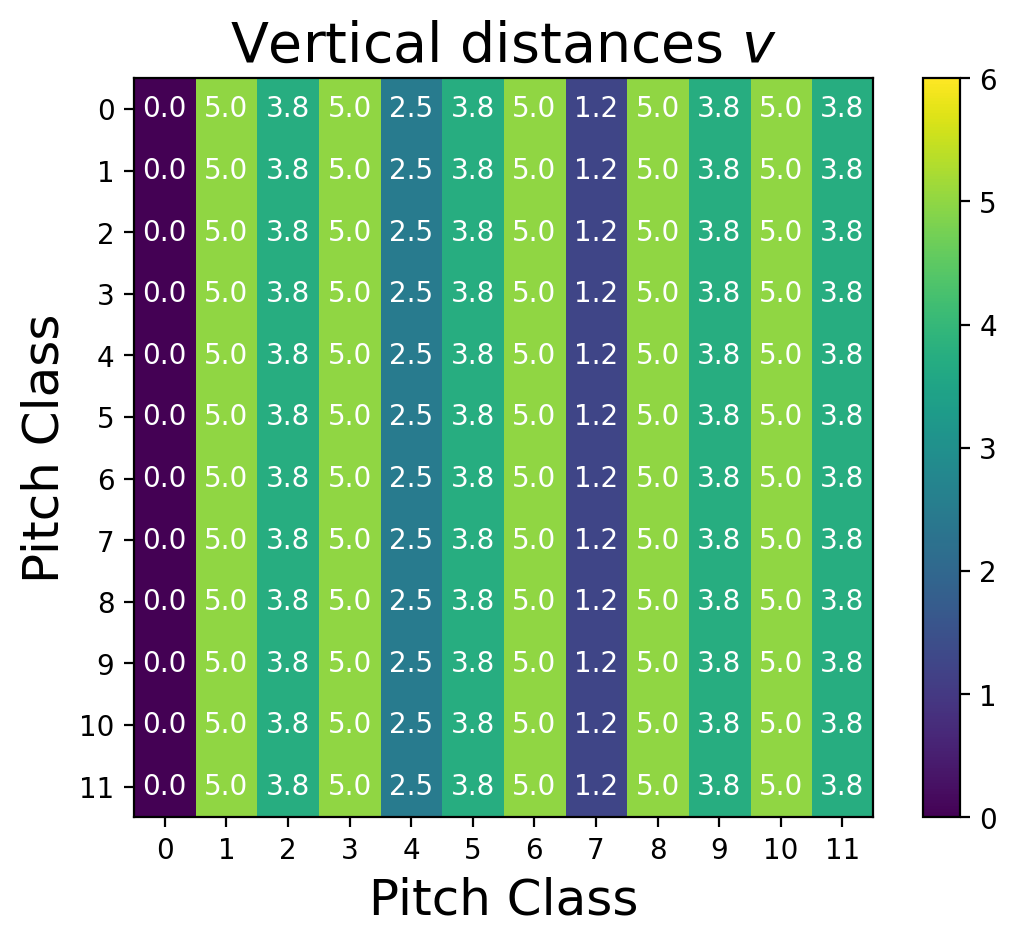

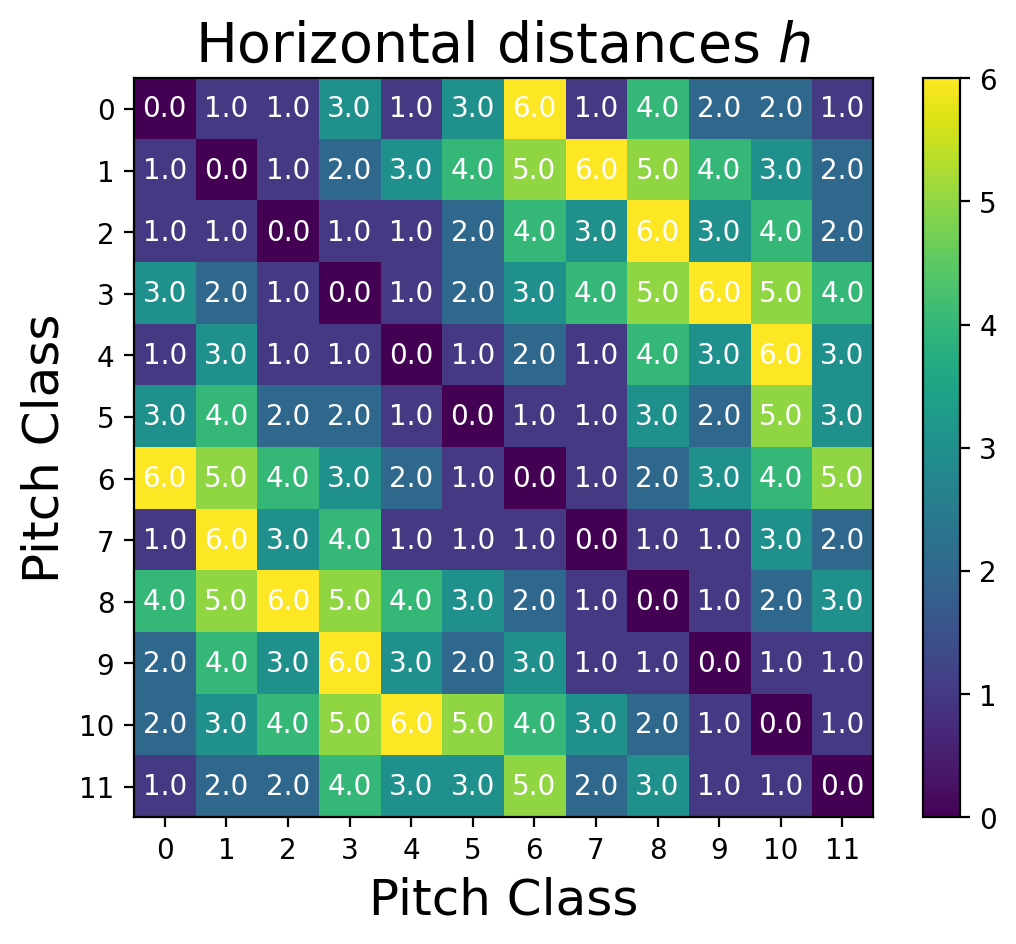

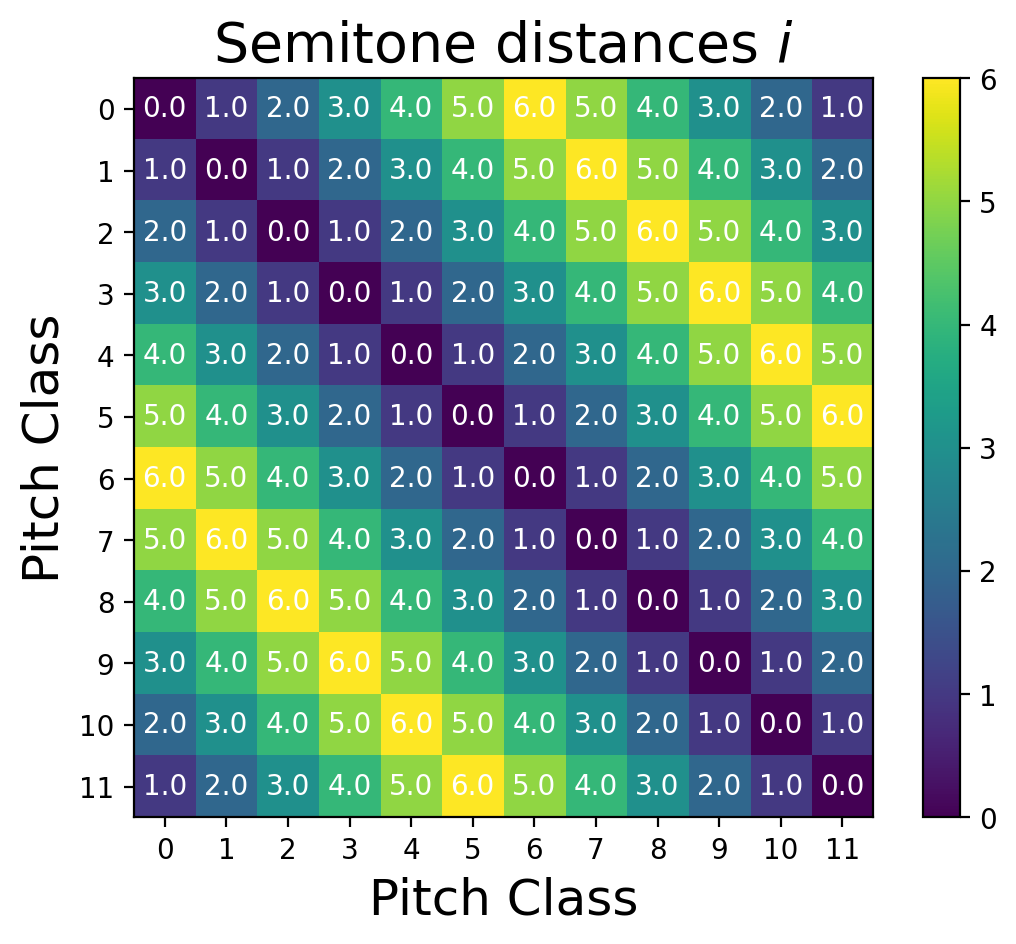

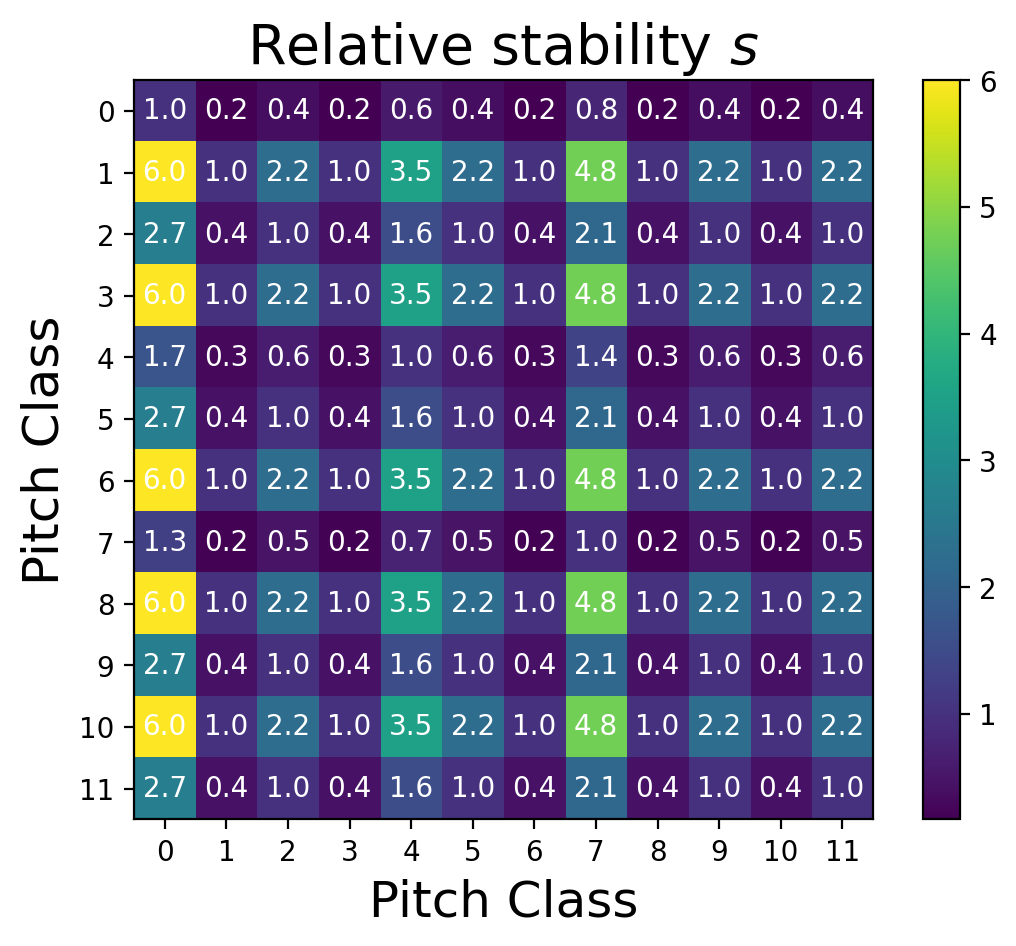

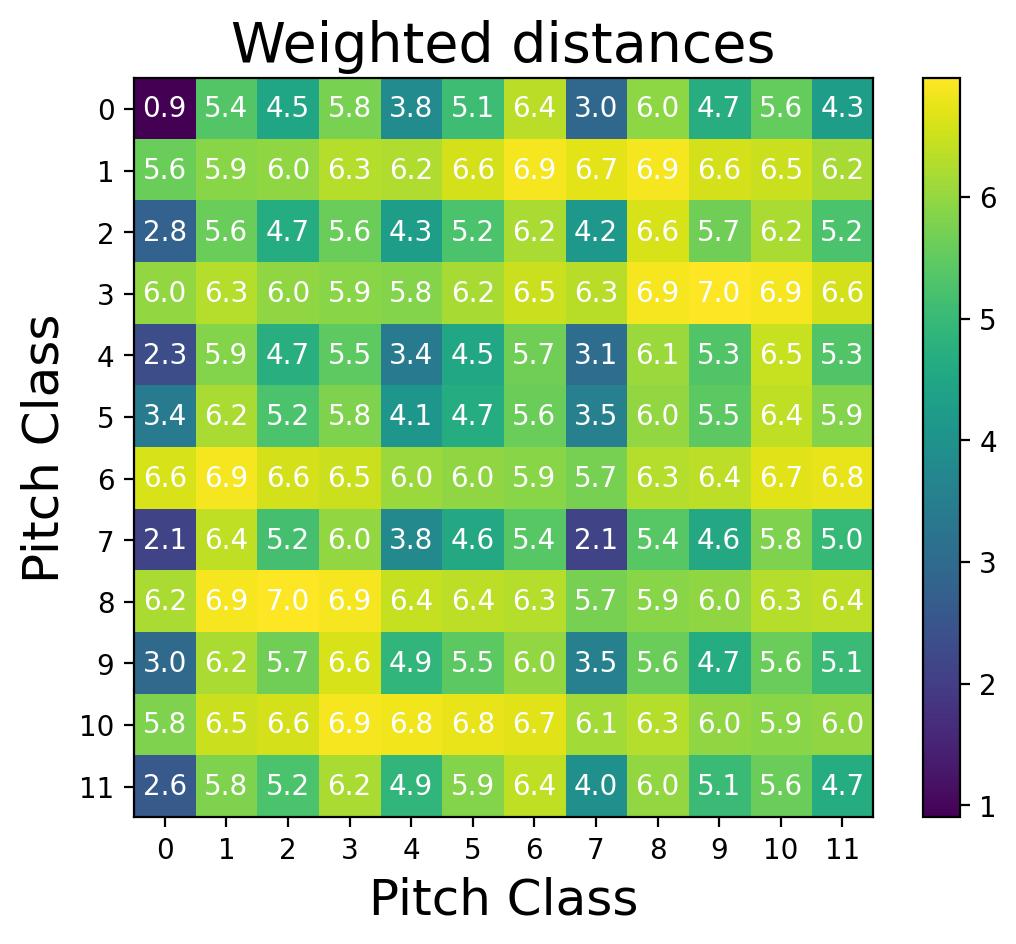

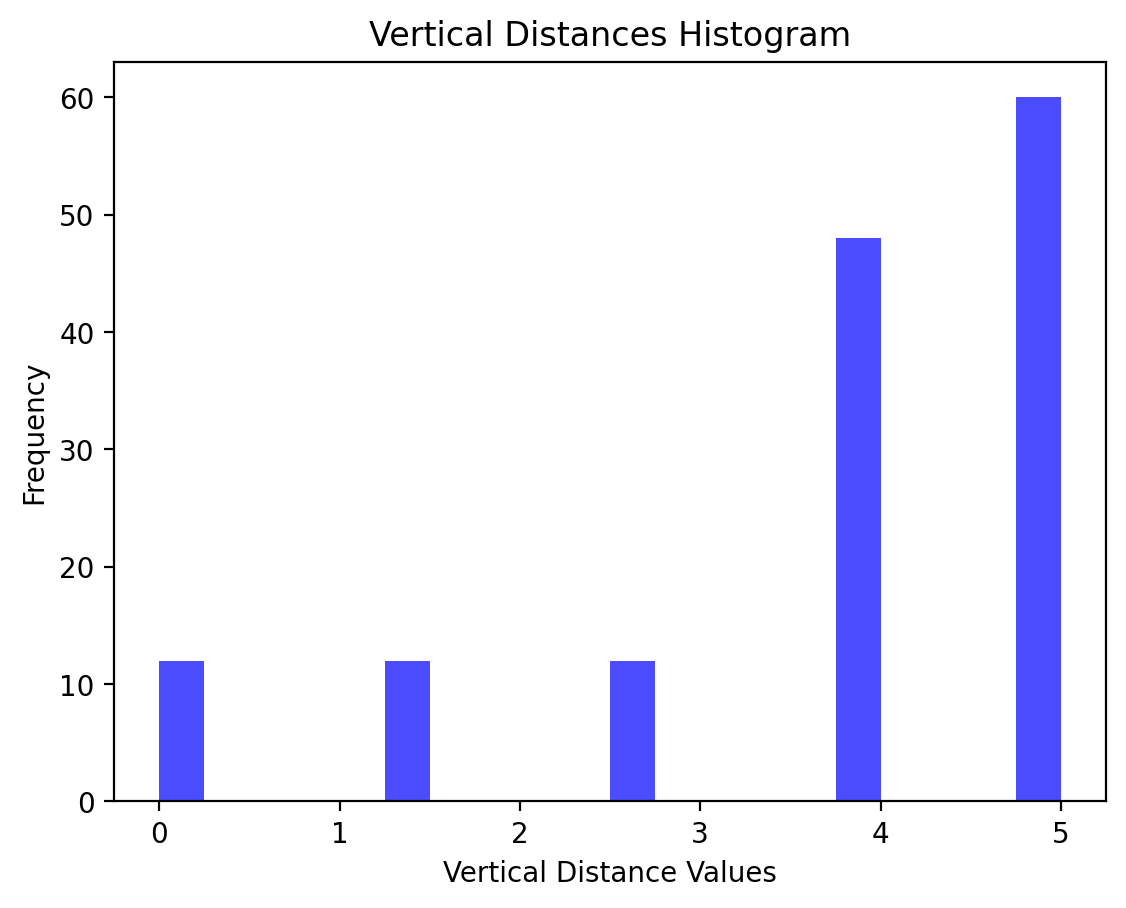

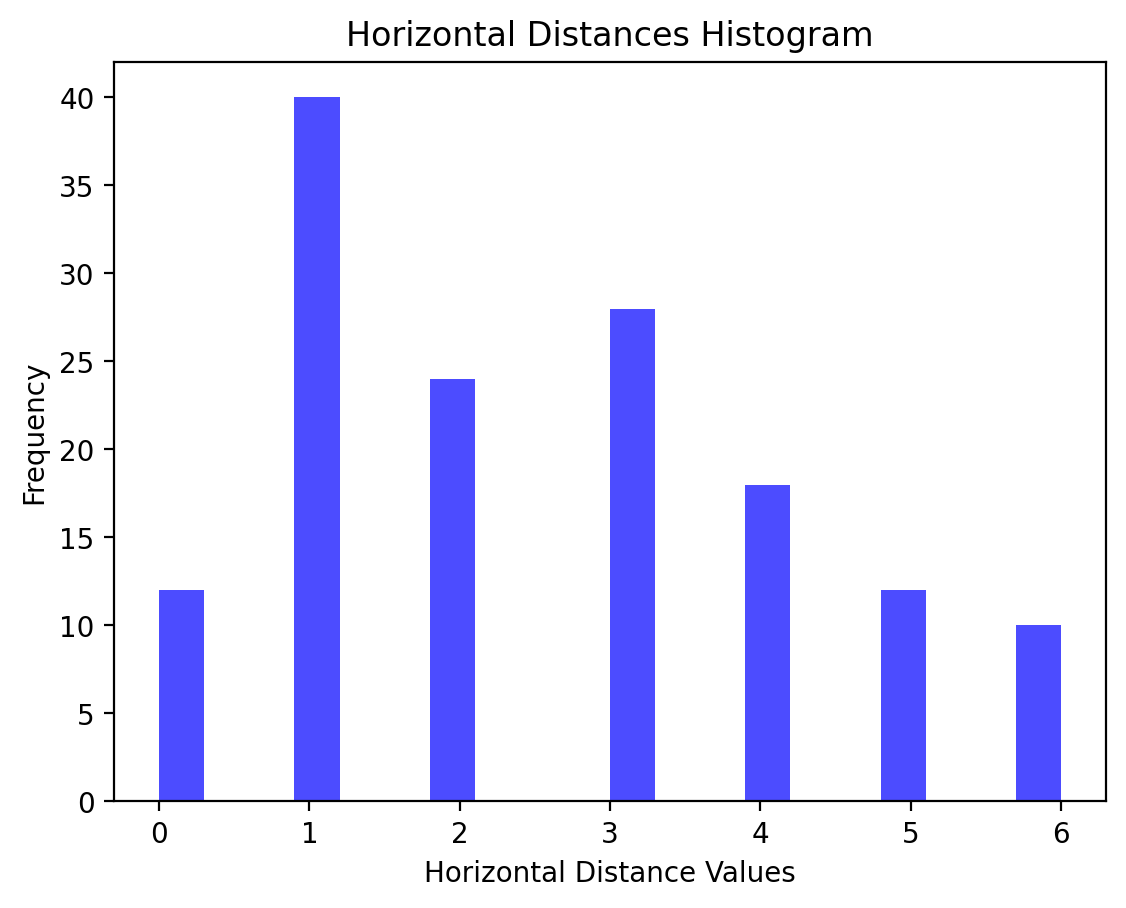

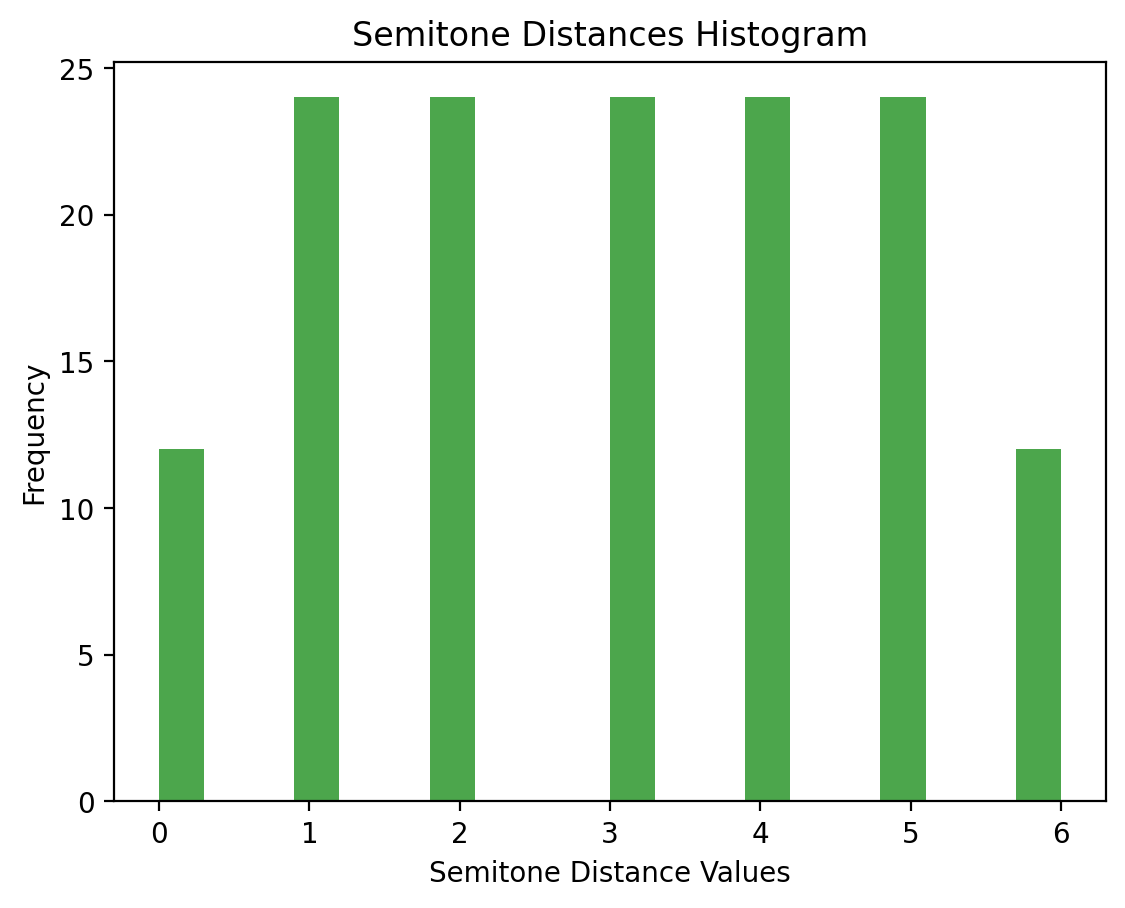

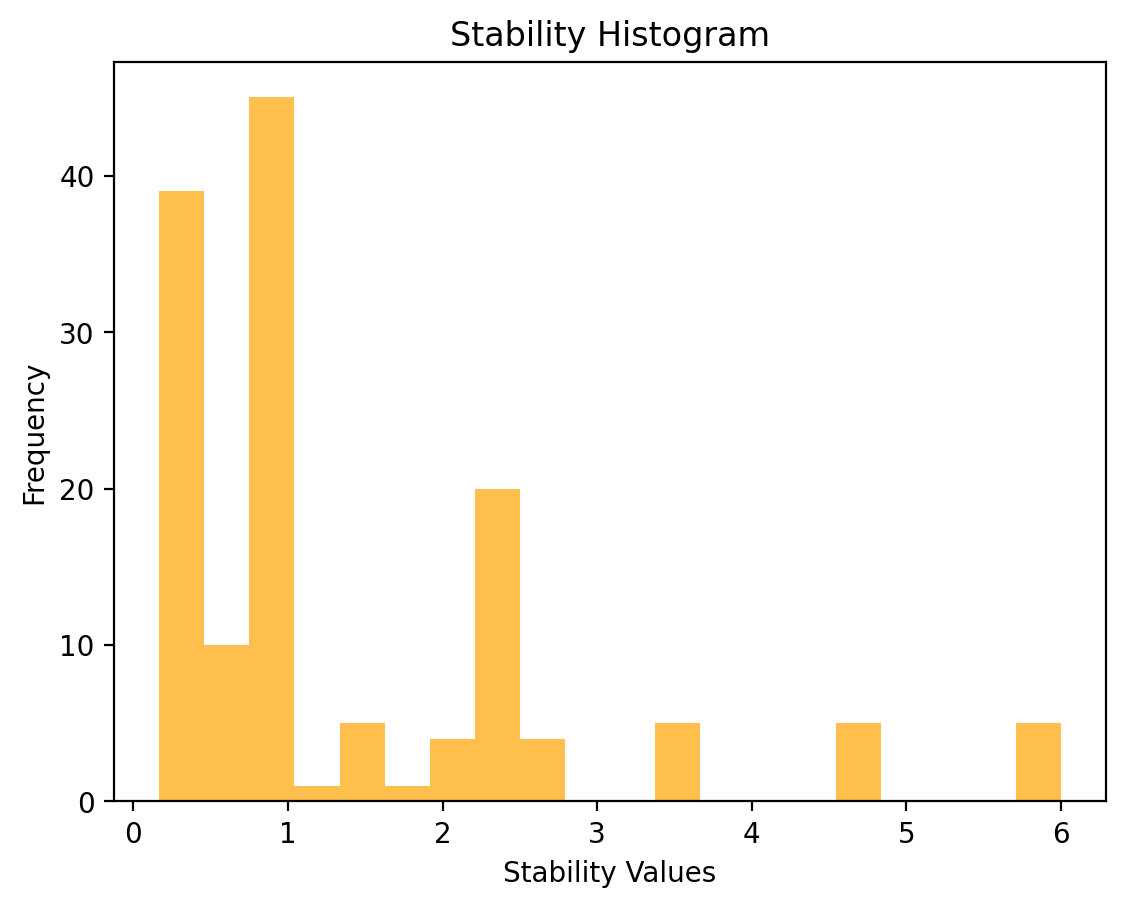

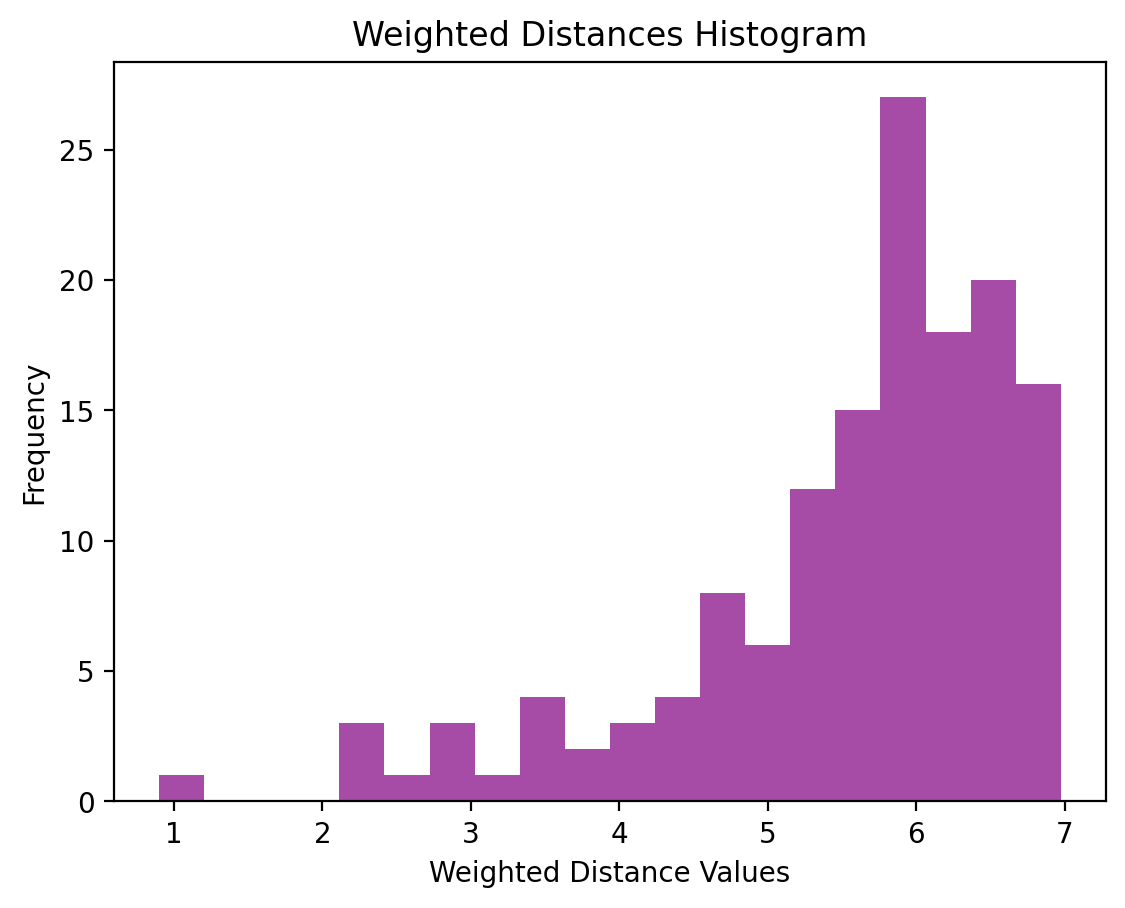

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def count_elements(array, start, end, value):
    # Initialize the count to zero
    count = 0
    # Loop from start to end, wrapping around if necessary
    i = start
    while i != end:
        # Check if the element is equal or above the value
        if array[i] >= value:
            # Increment the count
            count += 1
        # Increment the index, wrapping around if necessary
        i = (i + 1) % len(array)
    # Return the count
    return count

def compute_distances(pc1, pc2, pcp, vertical_weight, horizontal_weight, semitone_weight, stability_weight):
    # Calculate the distance embedding of the pc2
    vertical_distance = np.max(pcp) - pcp[pc2]

    # Compute the min between pcp[pc1] and pcp[pc2]
    min_value = min(pcp[pc1], pcp[pc2])

    # Count the number of elements in the array equal or above the min value
    count_forward = count_elements(pcp, pc1, pc2, min_value)
    count_backward = count_elements(pcp, pc2, pc1, min_value)
    horizontal_distance = min(count_forward, count_backward)

    # Calculate the minimal number for semitones p1 and p2
    semitone_distance = min(abs(pc1 - pc2), 12 - abs(pc1 - pc2))

    # Calculate the realtive stability between pc1 -> pc2
    stability = pcp[pc2] / pcp[pc1]

    # Calculate the weighted sum of distances
    distance = (
        vertical_weight * vertical_distance +
        horizontal_weight * horizontal_distance +
        semitone_weight * semitone_distance +
        stability_weight * stability
    )

    return vertical_distance, horizontal_distance, semitone_distance, stability, distance

basicSpace = [5, 1, 2, 1, 3, 2, 1, 4, 1, 2, 1, 2]
weights = [1.0, 0.0, 0.2, 0.9]

# Normalize basicSpace to have a minimum of 1 and maximum of 6
min_value = min(basicSpace)
max_value = max(basicSpace)
basicSpace = 1 + 5 * (np.array(basicSpace) - min_value) / (max_value - min_value)


distances_vertical = np.zeros((12, 12))
distances_horizontal = np.zeros((12, 12))
distances_semitone = np.zeros((12, 12))
distances_stability = np.zeros((12, 12))
weighted_distances = np.zeros((12, 12))

for pc1 in range(12):
    for pc2 in range(12):
        vertical, horizontal, semitone, stability, weighted_distance = compute_distances(pc1, pc2, basicSpace, weights[0], weights[1], weights[2], weights[3])
        distances_vertical[pc1, pc2] = vertical
        distances_horizontal[pc1, pc2] = horizontal
        distances_semitone[pc1, pc2] = semitone
        distances_stability[pc1, pc2] = stability
        weighted_distances[pc1, pc2] = weighted_distance

'''
# Plotting the heatmap for vertical distances
fig, ax = plt.subplots()
heatmap = ax.imshow(distances_vertical, cmap='viridis', interpolation='nearest')

for i in range(12):
    for j in range(12):
        text = ax.text(j, i, f'{distances_vertical[i, j]:.1f}', ha='center', va='center', color='white')

colorbar = plt.colorbar(heatmap)
plt.title('Vertical distances $v$', fontsize=20)
plt.xlabel('Pitch Class', fontsize=18)
plt.ylabel('Pitch Class', fontsize=18)
plt.xticks(range(12), labels=[str(i) for i in range(12)])
plt.yticks(range(12), labels=[str(i) for i in range(12)])
plt.show()
'''

# Plotting the heatmap for vertical distances
fig, ax = plt.subplots()
heatmap = ax.imshow(distances_vertical, cmap='viridis', interpolation='nearest', vmin=0, vmax=6)

for i in range(12):
    for j in range(12):
        text = ax.text(j, i, f'{distances_vertical[i, j]:.1f}', ha='center', va='center', color='white')

colorbar = plt.colorbar(heatmap)
plt.title('Vertical distances $v$', fontsize=20)
plt.xlabel('Pitch Class', fontsize=18)
plt.ylabel('Pitch Class', fontsize=18)
plt.xticks(range(12), labels=[str(i) for i in range(12)])
plt.yticks(range(12), labels=[str(i) for i in range(12)])
plt.show()


# Plotting the heatmap for horizontal distances
fig, ax = plt.subplots()
heatmap = ax.imshow(distances_horizontal, cmap='viridis', interpolation='nearest')

for i in range(12):
    for j in range(12):
        text = ax.text(j, i, f'{distances_horizontal[i, j]:.1f}', ha='center', va='center', color='white')

plt.colorbar(heatmap)
plt.title('Horizontal distances $h$', fontsize=20)
plt.xlabel('Pitch Class', fontsize=18)
plt.ylabel('Pitch Class', fontsize=18)
plt.xticks(range(12), labels=[str(i) for i in range(12)])
plt.yticks(range(12), labels=[str(i) for i in range(12)])
plt.show()

# Plotting the heatmap for semitone distances
fig, ax = plt.subplots()
heatmap = ax.imshow(distances_semitone, cmap='viridis', interpolation='nearest')

for i in range(12):
    for j in range(12):
        text = ax.text(j, i, f'{distances_semitone[i, j]:.1f}', ha='center', va='center', color='white')

plt.colorbar(heatmap)
plt.title('Semitone distances $i$', fontsize=20)
plt.xlabel('Pitch Class', fontsize=18)
plt.ylabel('Pitch Class', fontsize=18)
plt.xticks(range(12), labels=[str(i) for i in range(12)])
plt.yticks(range(12), labels=[str(i) for i in range(12)])
plt.show()

# Plotting the heatmap for stability
fig, ax = plt.subplots()
heatmap = ax.imshow(distances_stability, cmap='viridis', interpolation='nearest')

for i in range(12):
    for j in range(12):
        text = ax.text(j, i, f'{distances_stability[i, j]:.1f}', ha='center', va='center', color='white')

plt.colorbar(heatmap)
plt.title('Relative stability $s$', fontsize=20)
plt.xlabel('Pitch Class', fontsize=18)
plt.ylabel('Pitch Class', fontsize=18)
plt.xticks(range(12), labels=[str(i) for i in range(12)])
plt.yticks(range(12), labels=[str(i) for i in range(12)])
plt.show()

# Plotting the heatmap for weighted distances
fig, ax = plt.subplots()
heatmap = ax.imshow(weighted_distances, cmap='viridis', interpolation='nearest')

for i in range(12):
    for j in range(12):
        text = ax.text(j, i, f'{weighted_distances[i, j]:.1f}', ha='center', va='center', color='white')

plt.colorbar(heatmap)
plt.title('Weighted distances', fontsize=20)
plt.xlabel('Pitch Class', fontsize=18)
plt.ylabel('Pitch Class', fontsize=18)
plt.xticks(range(12), labels=[str(i) for i in range(12)])
plt.yticks(range(12), labels=[str(i) for i in range(12)])
plt.show()

# Plotting the histogram for vertical distances
plt.hist(distances_vertical.flatten(), bins=20, color='blue', alpha=0.7)
plt.title('Vertical Distances Histogram')
plt.xlabel('Vertical Distance Values')
plt.ylabel('Frequency')
plt.show()

# Plotting the histogram for horizontal distances
plt.hist(distances_horizontal.flatten(), bins=20, color='blue', alpha=0.7)
plt.title('Horizontal Distances Histogram')
plt.xlabel('Horizontal Distance Values')
plt.ylabel('Frequency')
plt.show()

# Plotting the histogram for semitone distances
plt.hist(distances_semitone.flatten(), bins=20, color='green', alpha=0.7)
plt.title('Semitone Distances Histogram')
plt.xlabel('Semitone Distance Values')
plt.ylabel('Frequency')
plt.show()

# Plotting the histogram for stability
plt.hist(distances_stability.flatten(), bins=20, color='orange', alpha=0.7)
plt.title('Stability Histogram')
plt.xlabel('Stability Values')
plt.ylabel('Frequency')
plt.show()

# Plotting the histogram for weighted distances
plt.hist(weighted_distances.flatten(), bins=20, color='purple', alpha=0.7)
plt.title('Weighted Distances Histogram')
plt.xlabel('Weighted Distance Values')
plt.ylabel('Frequency')
plt.show()

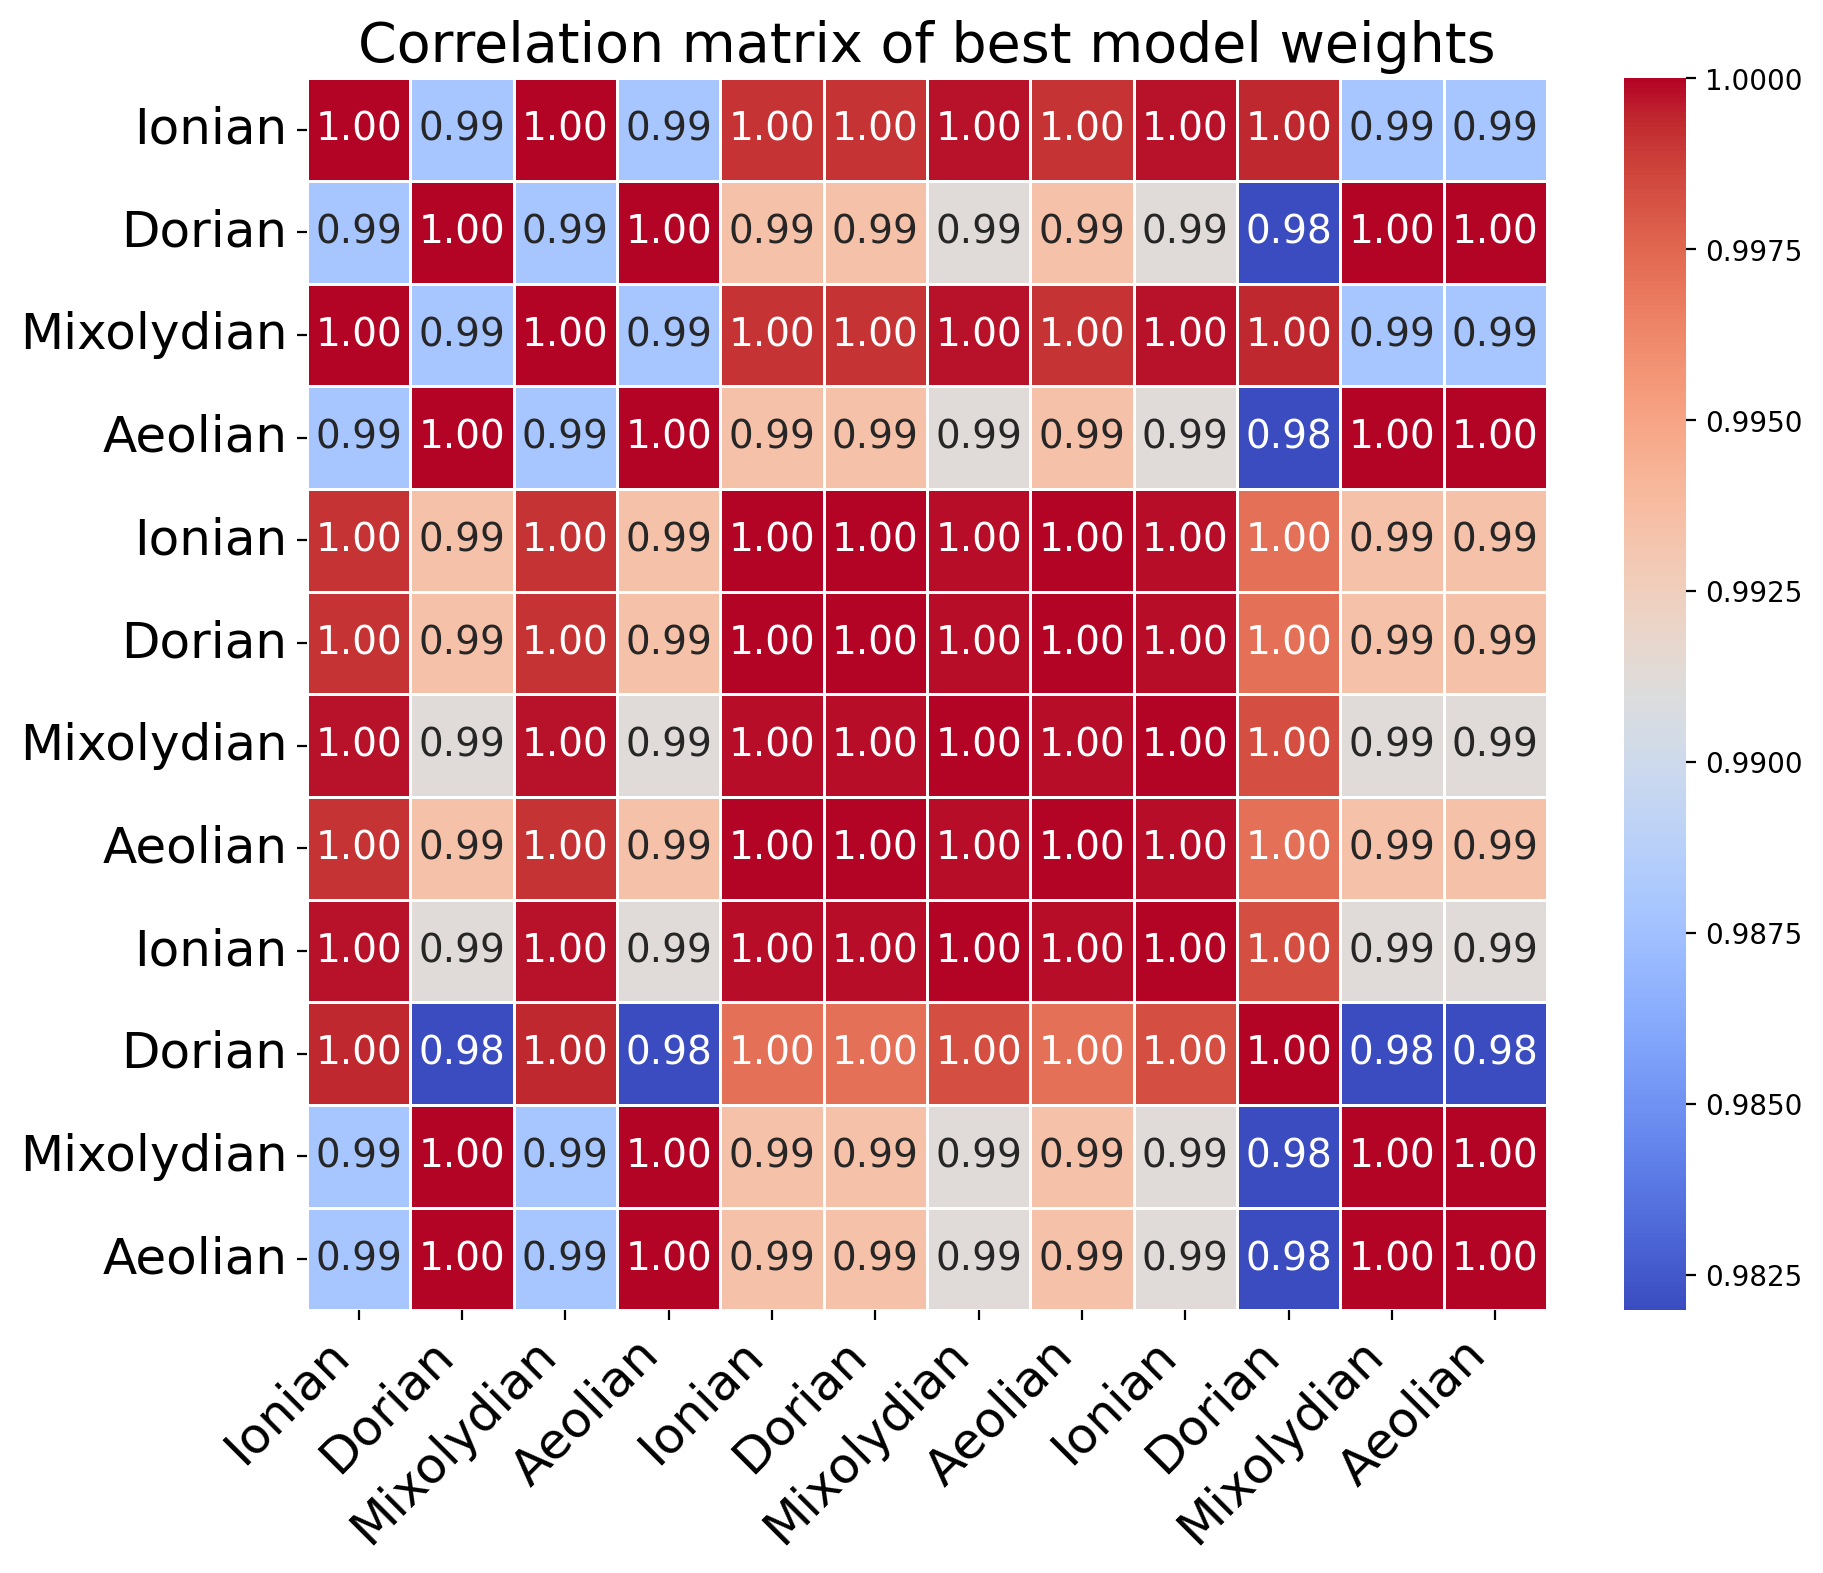

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#
# plt.rcParams["font.family"] = "Times New Roman"

# Data from the LaTeX table
data = {
    'Mode': ['Ionian', 'Dorian', 'Mixolydian', 'Aeolian'] * 3,
    'Dataset': ['Meertens'] * 4 + ['The Session'] * 4 + ['I-Folk'] * 4,
    'Weights': [
        (0.9, 0.3, 0.8), (0.7, 0.3, 0.7), (1.0, 0.4, 0.9), (0.5, 0.2, 0.5),
        (1.0, 0.2, 0.9), (1.0, 0.2, 0.9), (0.8, 0.1, 0.7), (1.0, 0.2, 0.9),
        (1.0, 0.3, 0.9), (0.9, 0.4, 0.8), (0.5, 0.1, 0.5), (0.8, 0.3, 0.8),
    ],
    'Embeddings': [
        [5.73, 1.01, 4.96, 1.00, 5.42, 3.52, 1.22, 6.00, 1.03, 3.32, 1.04, 2.86],
        [6.00, 1.00, 5.20, 5.47, 1.09, 4.21, 1.10, 5.86, 1.90, 2.09, 3.07, 2.23],
        [6.00, 1.00, 4.93, 1.07, 4.61, 5.02, 1.09, 5.56, 1.00, 4.11, 2.54, 1.64],
        [5.62, 1.00, 4.51, 5.27, 1.08, 4.51, 1.00, 6.00, 2.66, 1.30, 2.78, 1.83],
        [6.00, 1.00, 4.34, 1.00, 5.03, 2.88, 1.05, 5.11, 1.00, 3.54, 1.04, 2.75],
        [6.00, 1.00, 4.35, 2.87, 1.05, 3.96, 1.01, 4.66, 1.03, 2.05, 4.75, 1.06],
        [6.00, 1.00, 3.75, 1.06, 3.43, 3.85, 1.00, 5.00, 1.01, 2.74, 3.34, 1.16],
        [6.00, 1.00, 4.08, 4.72, 1.02, 4.21, 1.02, 5.22, 2.04, 1.09, 3.92, 1.17],
        [5.16, 1.02, 3.99, 1.06, 4.78, 3.57, 1.00, 6.00, 1.03, 2.75, 1.11, 2.17],
        [6.00, 1.00, 4.78, 5.09, 1.00, 4.96, 1.18, 4.90, 2.22, 3.38, 3.20, 1.00],
        [6.00, 1.10, 4.13, 1.36, 2.54, 2.74, 1.00, 2.05, 1.02, 2.36, 1.87, 1.17],
        [6.00, 1.73, 4.46, 3.65, 1.30, 3.62, 1.00, 4.05, 1.98, 1.46, 2.64, 1.72],
    ],
}

# Create DataFrames for Weights and Embeddings
weights_df = pd.DataFrame({'Mode': data['Mode'], 'Dataset': data['Dataset'], 'Weights': data['Weights']})
embeddings_df = pd.DataFrame({'Mode': data['Mode'], 'Dataset': data['Dataset'], 'Embeddings': data['Embeddings']})

# Extract weights from the data
weights_data = np.array(data['Weights']).T

# Compute correlation matrix for all weight vectors
correlation_matrix_all_weights = np.corrcoef(weights_data, rowvar=False)

# Create a DataFrame from the correlation matrix for all weights
correlation_df_all_weights = pd.DataFrame(correlation_matrix_all_weights, columns=data['Mode'], index=data['Mode'])

# Plot heatmap for all weights with increased font size
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_df_all_weights, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5,
                      annot_kws={"size": 14})  # Adjust the font size for annotations as needed

# Increase font size for column and row labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=18, rotation=45, ha='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=18)

plt.title('Correlation matrix of best model weights', fontsize=20)  # Increased font size for the title
plt.show()

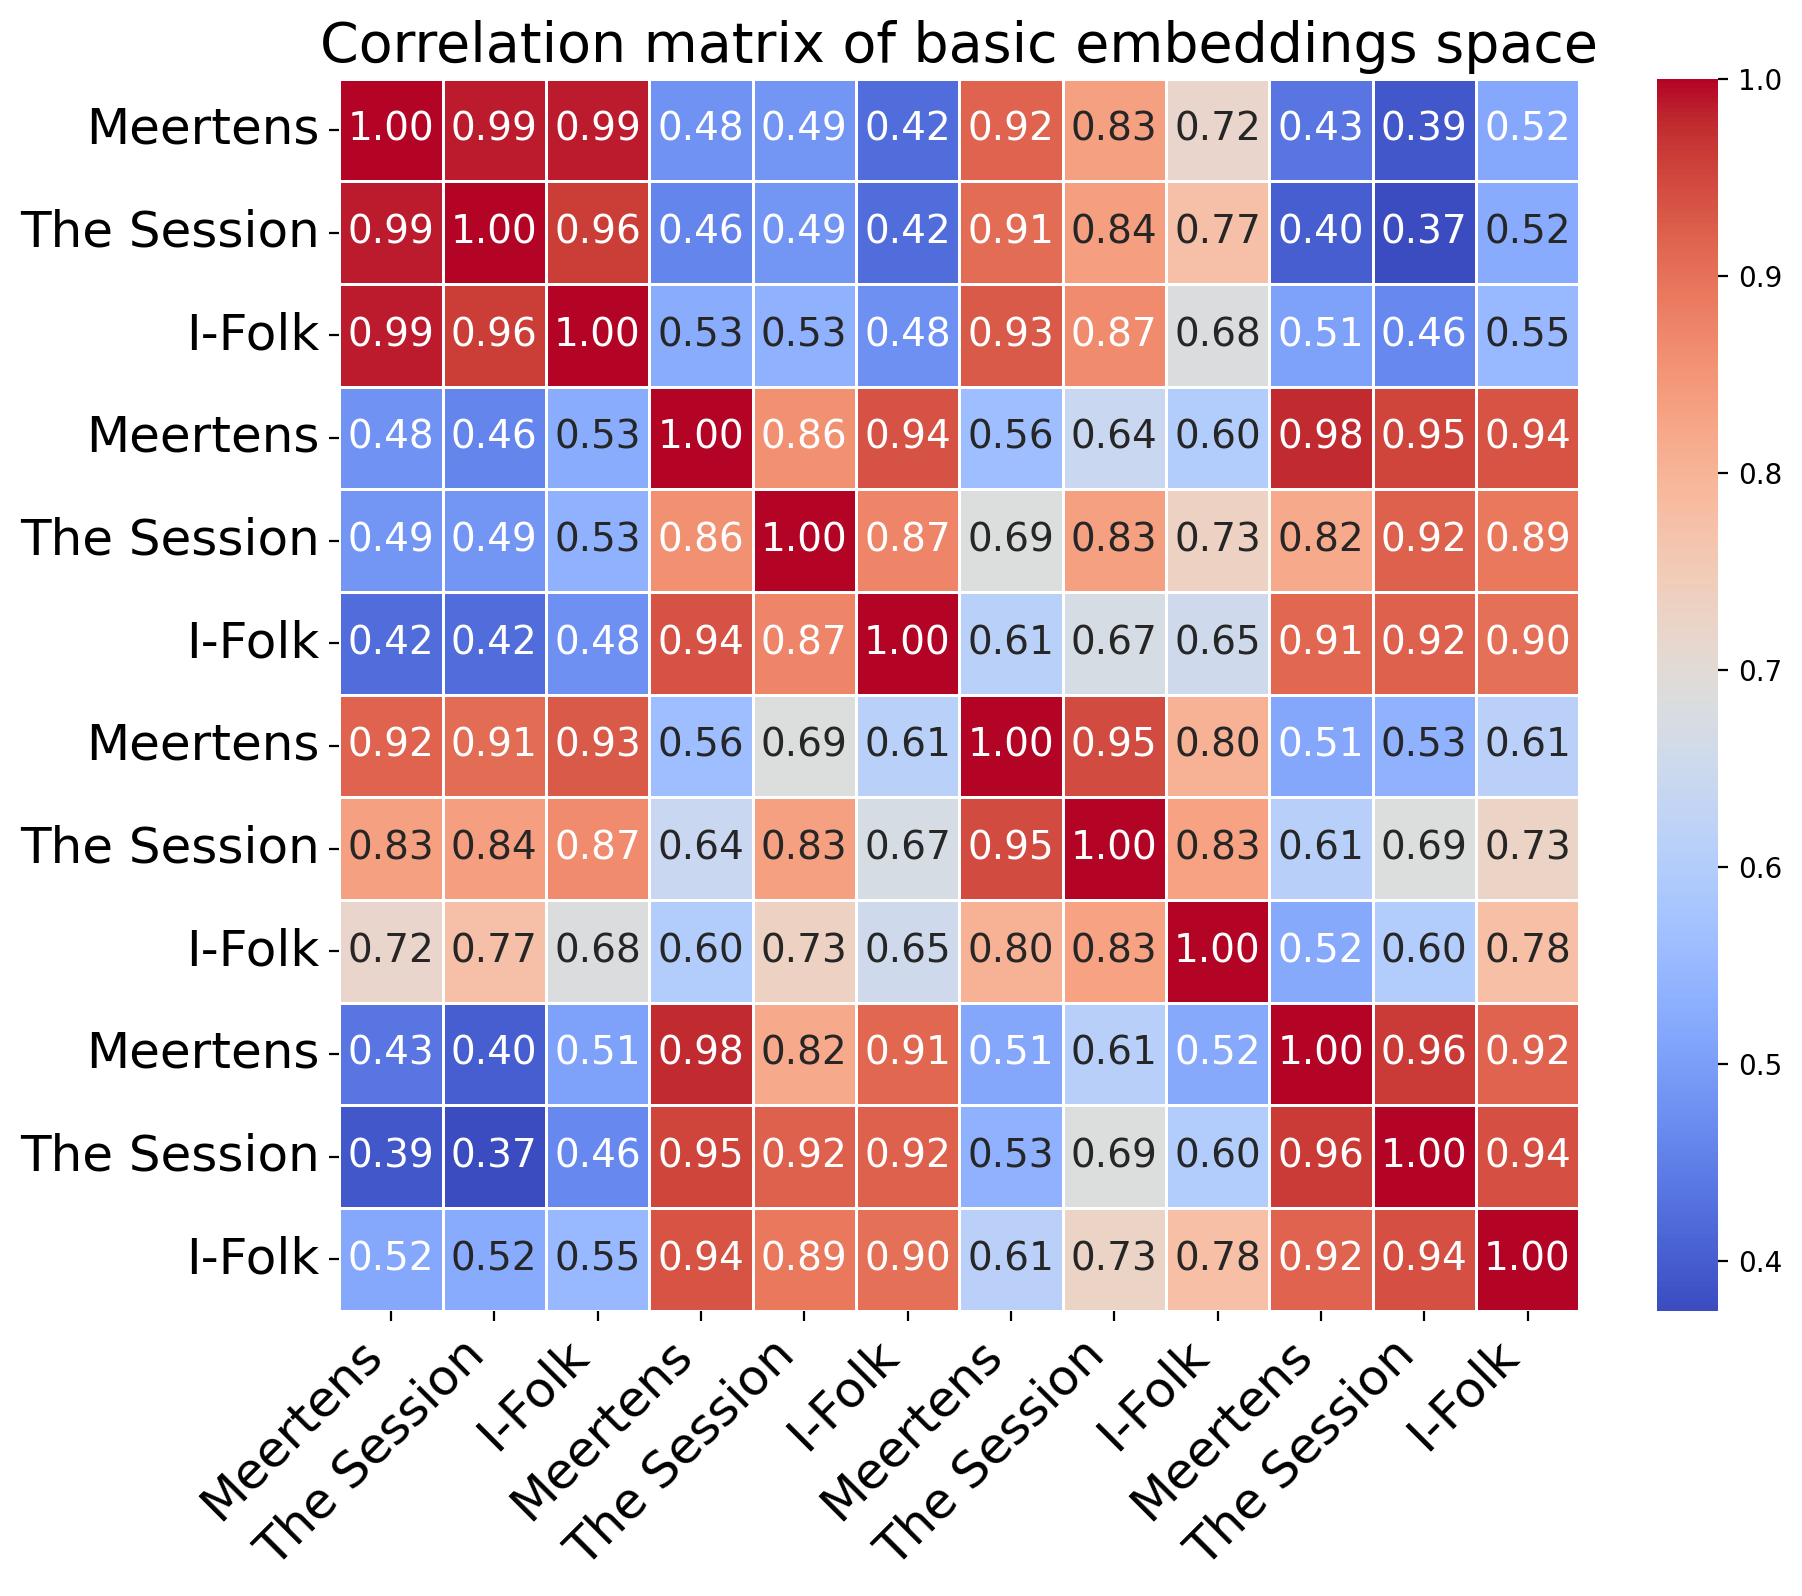

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data from the LaTeX table
data = {
    'Mode': ['Ionian', 'Dorian', 'Mixolydian', 'Aeolian'] * 3,
    'Dataset': ['Meertens'] * 4 + ['The Session'] * 4 + ['I-Folk'] * 4,
    'Weights': [
        (0.9, 0.3, 0.8), (0.7, 0.3, 0.7), (1.0, 0.4, 0.9), (0.5, 0.2, 0.5),
        (1.0, 0.2, 0.9), (1.0, 0.2, 0.9), (0.8, 0.1, 0.7), (1.0, 0.2, 0.9),
        (1.0, 0.3, 0.9), (0.9, 0.4, 0.8), (0.5, 0.1, 0.5), (0.8, 0.3, 0.8),
    ],
    'Embeddings': [
        [5.73, 1.01, 4.96, 1.00, 5.42, 3.52, 1.22, 6.00, 1.03, 3.32, 1.04, 2.86],
        [6.00, 1.00, 5.20, 5.47, 1.09, 4.21, 1.10, 5.86, 1.90, 2.09, 3.07, 2.23],
        [6.00, 1.00, 4.93, 1.07, 4.61, 5.02, 1.09, 5.56, 1.00, 4.11, 2.54, 1.64],
        [5.62, 1.00, 4.51, 5.27, 1.08, 4.51, 1.00, 6.00, 2.66, 1.30, 2.78, 1.83],
        [6.00, 1.00, 4.34, 1.00, 5.03, 2.88, 1.05, 5.11, 1.00, 3.54, 1.04, 2.75],
        [6.00, 1.00, 4.35, 2.87, 1.05, 3.96, 1.01, 4.66, 1.03, 2.05, 4.75, 1.06],
        [6.00, 1.00, 3.75, 1.06, 3.43, 3.85, 1.00, 5.00, 1.01, 2.74, 3.34, 1.16],
        [6.00, 1.00, 4.08, 4.72, 1.02, 4.21, 1.02, 5.22, 2.04, 1.09, 3.92, 1.17],
        [5.16, 1.02, 3.99, 1.06, 4.78, 3.57, 1.00, 6.00, 1.03, 2.75, 1.11, 2.17],
        [6.00, 1.00, 4.78, 5.09, 1.00, 4.96, 1.18, 4.90, 2.22, 3.38, 3.20, 1.00],
        [6.00, 1.10, 4.13, 1.36, 2.54, 2.74, 1.00, 2.05, 1.02, 2.36, 1.87, 1.17],
        [6.00, 1.73, 4.46, 3.65, 1.30, 3.62, 1.00, 4.05, 1.98, 1.46, 2.64, 1.72],
    ],
}

# Create DataFrames for Weights and Embeddings
weights_df = pd.DataFrame({'Mode': data['Mode'], 'Dataset': data['Dataset'], 'Weights': data['Weights']})
embeddings_df = pd.DataFrame({'Mode': data['Mode'], 'Dataset': data['Dataset'], 'Embeddings': data['Embeddings']})

# Extract embeddings from the data and order by mode
ordered_embeddings_data = np.array([data['Embeddings'][i] for i in [0, 4, 8, 1, 5, 9, 2, 6, 10, 3, 7, 11]]).T

# Add Dataset labels to the mode labels for better distinction
ordered_mode_labels = [f"{dataset}" for dataset in [data['Dataset'][i] for i in [0, 4, 8, 1, 5, 9, 2, 6, 10, 3, 7, 11]]]


# Compute correlation matrix for ordered embeddings
correlation_matrix_ordered_embeddings = np.corrcoef(ordered_embeddings_data, rowvar=False)

# Create a DataFrame from the correlation matrix for ordered embeddings with labels
correlation_df_ordered_embeddings = pd.DataFrame(correlation_matrix_ordered_embeddings, columns=ordered_mode_labels, index=ordered_mode_labels)

# ... (previous code)

# Plot heatmap for ordered embeddings with increased font size
plt.figure(figsize=(10, 8))
heatmap_ordered_embeddings = sns.heatmap(correlation_df_ordered_embeddings, annot=True, cmap='coolwarm', fmt='.2f',
                                         linewidths=.5, annot_kws={"size": 14})  # Adjust the font size for annotations as needed

# Increase font size for column and row labels
heatmap_ordered_embeddings.set_xticklabels(heatmap_ordered_embeddings.get_xticklabels(), fontsize=18, rotation=45, ha='right')
heatmap_ordered_embeddings.set_yticklabels(heatmap_ordered_embeddings.get_yticklabels(), fontsize=18)

plt.title('Correlation matrix of basic embeddings space', fontsize=20)  # Increased font size for the title
plt.show()



# L_1 Model weights

In [ ]:
import numpy as np

# Weights data
weights_data = [
    (0.9, 0.3, 0.8),
    (0.7, 0.3, 0.7),
    (1.0, 0.4, 0.9),
    (0.5, 0.2, 0.5),
    (1.0, 0.2, 0.9),
    (1.0, 0.2, 0.9),
    (0.8, 0.1, 0.7),
    (1.0, 0.2, 0.9),
    (1.0, 0.3, 0.9),
    (0.9, 0.4, 0.8),
    (0.5, 0.1, 0.5),
    (0.8, 0.3, 0.8)
]

# Convert the data into a NumPy array
weights_array = np.array(weights_data)

# Normalize each row so that the sum is 1
normalized_weights = weights_array / np.sum(weights_array, axis=1, keepdims=True)

# Average the normalized weights
average_normalized_weights = np.mean(normalized_weights, axis=0)

# Print the results
print("Normalized Weights:")
print(normalized_weights)
print("\nAverage Normalized Weights:")
print(average_normalized_weights)


Normalized Weights:
[[0.45       0.15       0.4       ]
 [0.41176471 0.17647059 0.41176471]
 [0.43478261 0.17391304 0.39130435]
 [0.41666667 0.16666667 0.41666667]
 [0.47619048 0.0952381  0.42857143]
 [0.47619048 0.0952381  0.42857143]
 [0.5        0.0625     0.4375    ]
 [0.47619048 0.0952381  0.42857143]
 [0.45454545 0.13636364 0.40909091]
 [0.42857143 0.19047619 0.38095238]
 [0.45454545 0.09090909 0.45454545]
 [0.42105263 0.15789474 0.42105263]]

Average Normalized Weights:
[0.4500417  0.13257569 0.41738262]


# Basic Embeddings Space Comparison (Empirical vs. Theorectical)

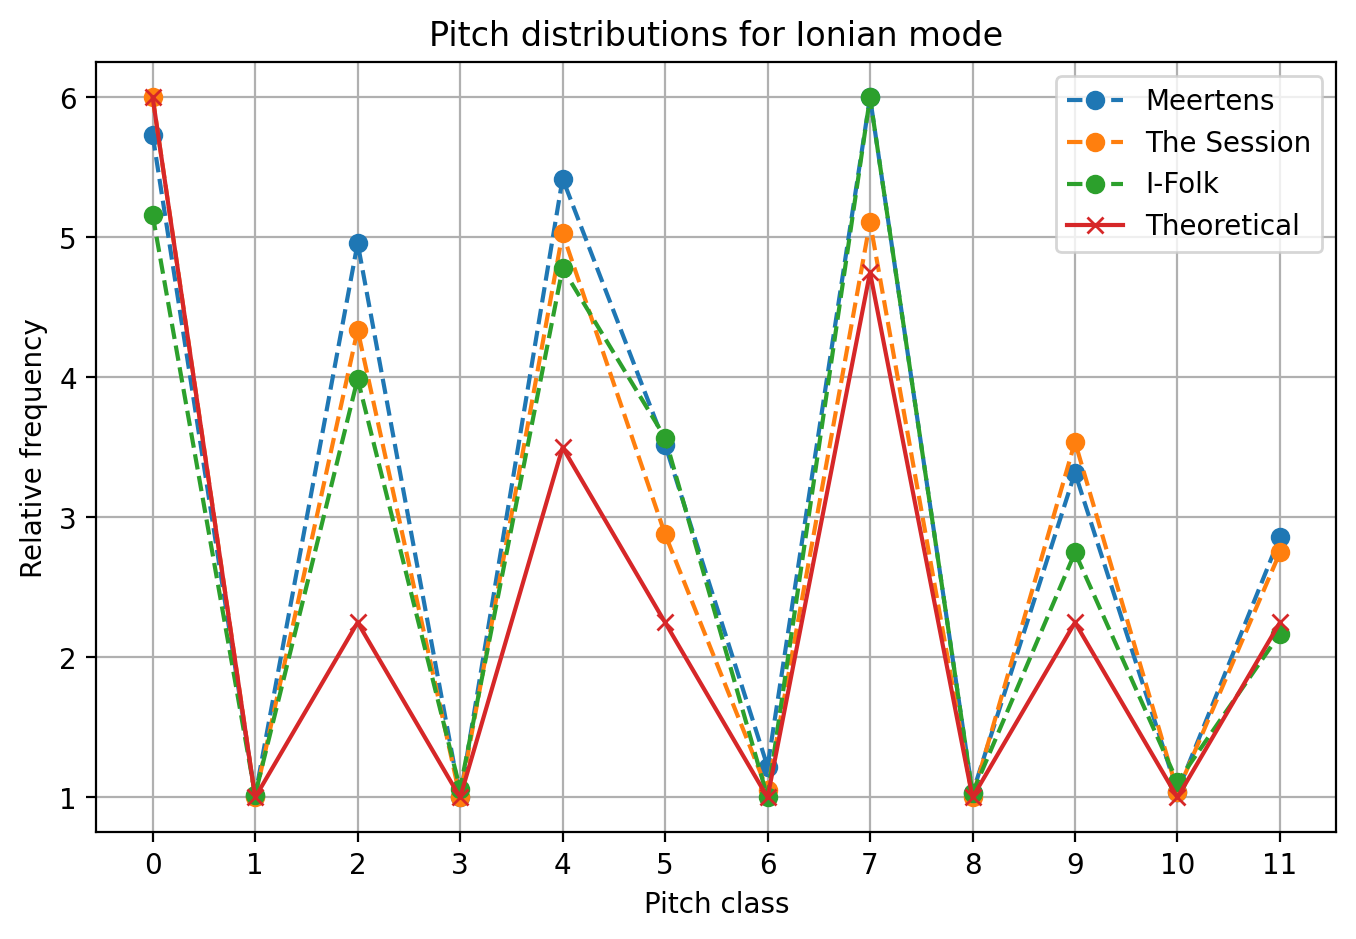

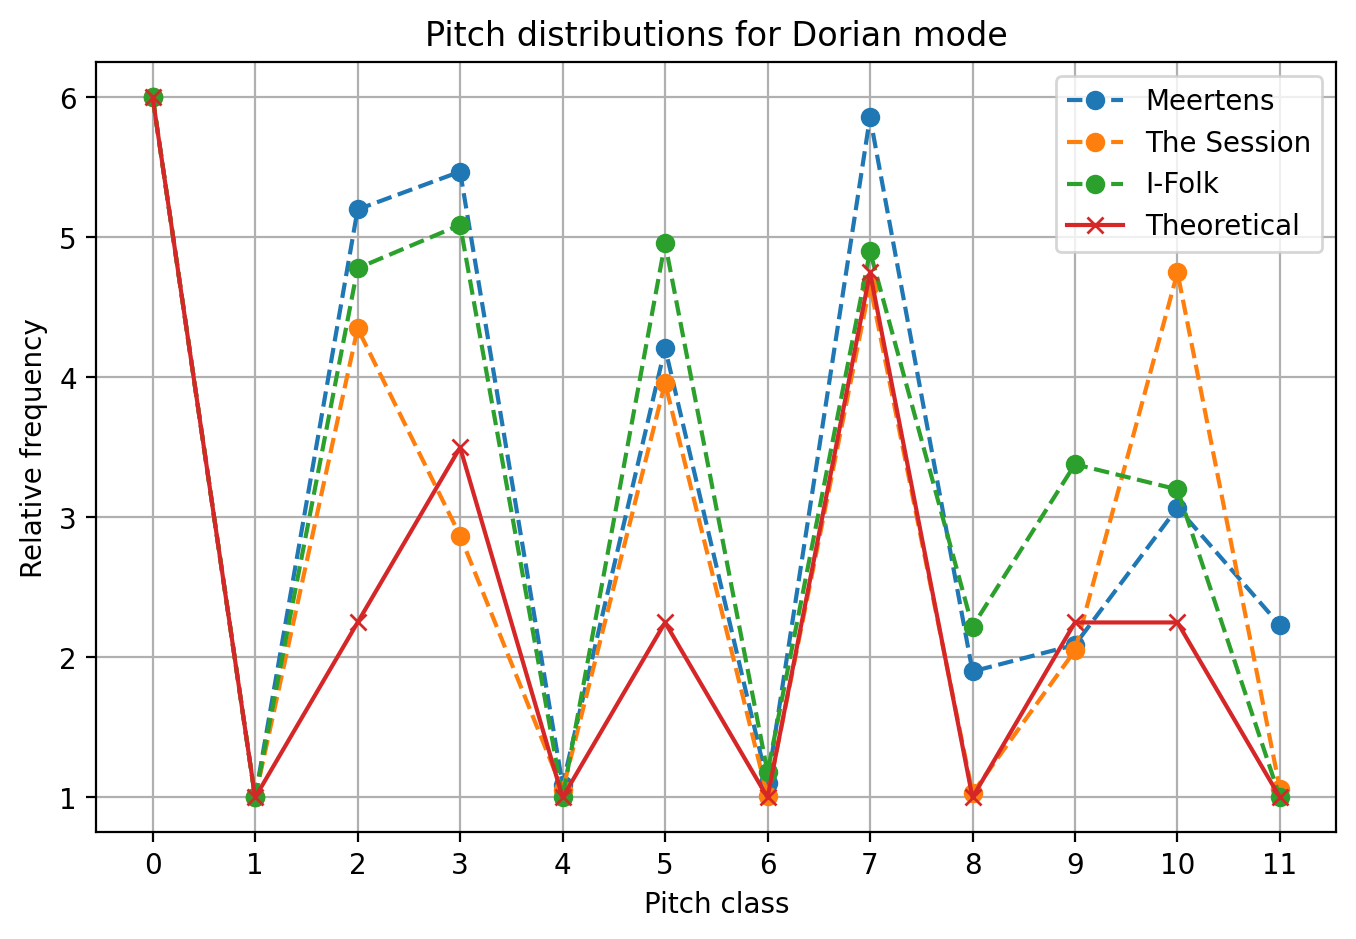

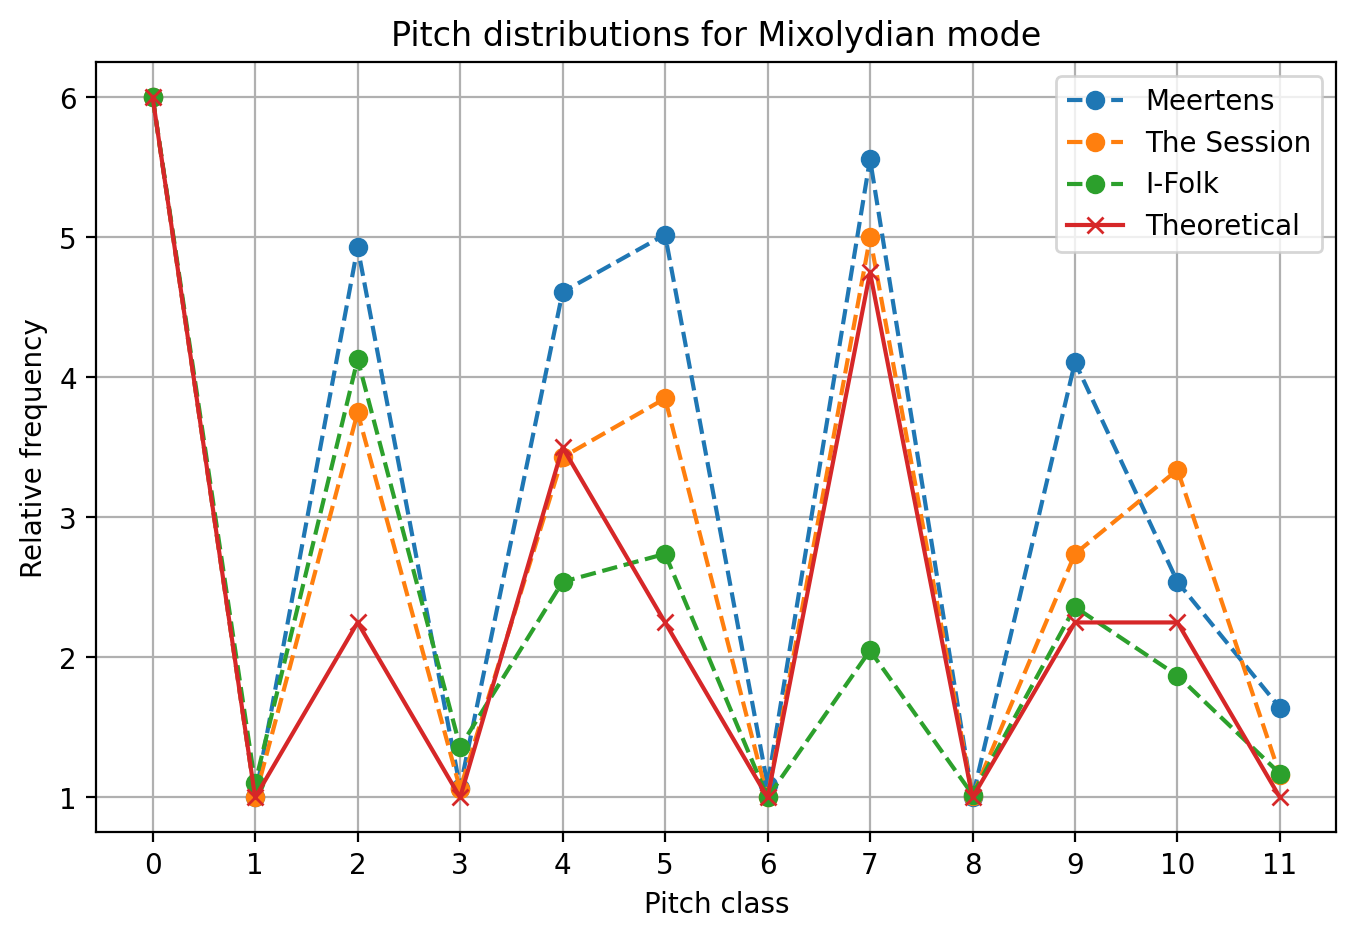

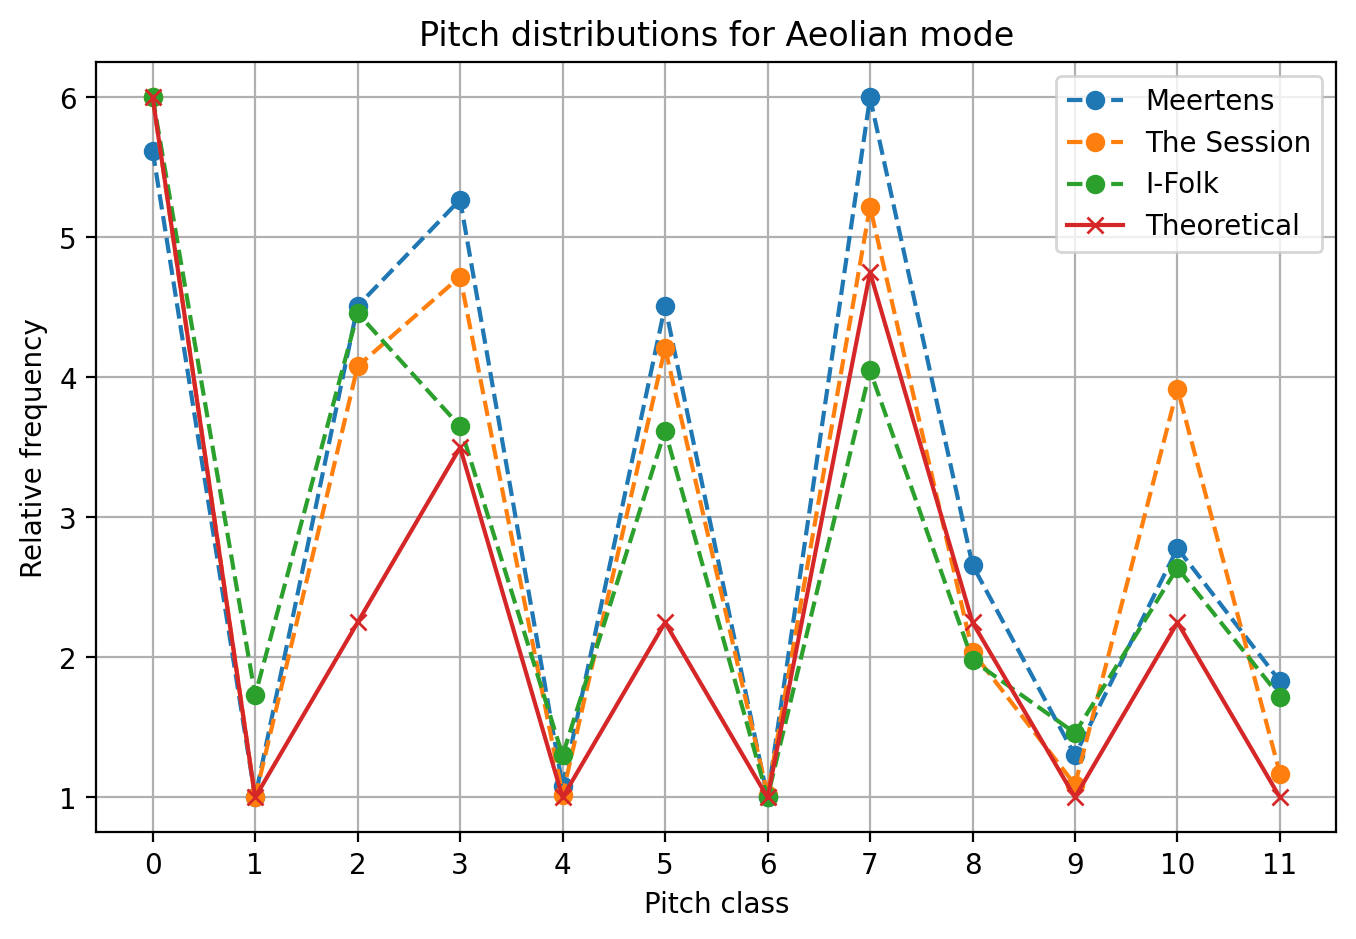

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Empirical embeddings
data_set_1 = {
    'Dataset': ['Meertens']*4 + ['The Session']*4 + ['I-Folk']*4,
    'Mode': ['Ionian', 'Dorian', 'Mixolydian', 'Aeolian']*3,
    'Vector': [
        (5.73, 1.01, 4.96, 1.00, 5.42, 3.52, 1.22, 6.00, 1.03, 3.32, 1.04, 2.86),
        (6.00, 1.00, 5.20, 5.47, 1.09, 4.21, 1.10, 5.86, 1.90, 2.09, 3.07, 2.23),
        (6.00, 1.00, 4.93, 1.07, 4.61, 5.02, 1.09, 5.56, 1.00, 4.11, 2.54, 1.64),
        (5.62, 1.00, 4.51, 5.27, 1.08, 4.51, 1.00, 6.00, 2.66, 1.30, 2.78, 1.83),
        (6.00, 1.00, 4.34, 1.00, 5.03, 2.88, 1.05, 5.11, 1.00, 3.54, 1.04, 2.75),
        (6.00, 1.00, 4.35, 2.87, 1.05, 3.96, 1.01, 4.66, 1.03, 2.05, 4.75, 1.06),
        (6.00, 1.00, 3.75, 1.06, 3.43, 3.85, 1.00, 5.00, 1.01, 2.74, 3.34, 1.16),
        (6.00, 1.00, 4.08, 4.72, 1.02, 4.21, 1.02, 5.22, 2.04, 1.09, 3.92, 1.17),
        (5.16, 1.02, 3.99, 1.06, 4.78, 3.57, 1.00, 6.00, 1.03, 2.75, 1.11, 2.17),
        (6.00, 1.00, 4.78, 5.09, 1.00, 4.96, 1.18, 4.90, 2.22, 3.38, 3.20, 1.00),
        (6.00, 1.10, 4.13, 1.36, 2.54, 2.74, 1.00, 2.05, 1.02, 2.36, 1.87, 1.17),
        (6.00, 1.73, 4.46, 3.65, 1.30, 3.62, 1.00, 4.05, 1.98, 1.46, 2.64, 1.72)
    ]
}

# Theorectical embeddings
data_set_2 = {
    'Dataset': ['Theoretical']*4,
    'Mode': ['Ionian', 'Dorian', 'Mixolydian', 'Aeolian'],
    'Vector': [
        (6, 1, 2.25, 1, 3.5, 2.25, 1, 4.75, 1, 2.25, 1, 2.25),
        (6, 1, 2.25, 3.5, 1, 2.25, 1, 4.75, 1, 2.25, 2.25, 1),
        (6, 1, 2.25, 1, 3.5, 2.25, 1, 4.75, 1, 2.25, 2.25, 1),
        (6, 1, 2.25, 3.5, 1, 2.25, 1, 4.75, 2.25, 1, 2.25, 1)
    ]
}

# Create DataFrames
df_set_1 = pd.DataFrame(data_set_1)
df_set_2 = pd.DataFrame(data_set_2)

# Concatenate DataFrames
result_df = pd.concat([df_set_1, df_set_2], ignore_index=True)

# Function to extract vectors for a specific mode
def extract_vectors(df, mode):
    return np.array(df[df['Mode'] == mode]['Vector'].tolist())



# Plotting
modes = ['Ionian', 'Dorian', 'Mixolydian', 'Aeolian']

for mode in modes:
    plt.figure(figsize=(8, 5))

    vectors_set_1 = extract_vectors(df_set_1, mode)
    vectors_set_2 = extract_vectors(df_set_2, mode)

    # Plotting set 1
    for dataset_name in df_set_1['Dataset'].unique():
        vectors_set_1_current = extract_vectors(df_set_1[df_set_1['Dataset'] == dataset_name], mode)
        plt.plot(vectors_set_1_current.T, label=f'{dataset_name}', linestyle='--', marker='o')

    # Plotting set 2
    plt.plot(vectors_set_2.T, label=f'Theoretical', linestyle='-', marker='x')

    plt.title(f'Pitch distributions for {mode} mode')
    plt.xlabel('Pitch class')
    plt.ylabel('Relative frequency')
    plt.xticks(np.arange(12), np.arange(12))
    plt.legend()
    plt.grid(True)
    plt.show()

